# A Machine Learning Approach to Mushroom Classification: Predicting Edibility and Toxicity Based on Physical Characteristics Using the UC Irvine Audubon Society Field Guide Dataset    

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
UCI Machine Learning Repository Link: https://archive.ics.uci.edu/dataset/73/mushroom <br>
18 March 2025 <br>

### Introduction
The objective of the Mushroom Classification problem is to predict whether a mushroom is edible or poisonous based on its physical and chemical characteristics. The dataset includes descriptions of 23 species of gilled mushrooms from the Agaricus and Lepiota families. These mushrooms are classified as definitely edible or definitely poisonous (including those with unknown edibility, which were grouped into the poisonous category). 

Unlike other biological classifications, there is no simple rule (such as "leaflets three, let it be" for poison ivy) to determine a mushroom’s safety. Instead, various morphological and chemical features must be analyzed, making machine learning a valuable tool for automating classification.

This project will involve: <br>

- Decision Tree Classifier (DT)  

    A Decision Tree splits data into smaller groups based on decision rules (such as "is cap color white?"). It works like a flowchart, where each decision point leads to another question until a final classification is reached. <br>

    Strengths: Easy to interpret and fast to train. <br>
    Weaknesses: Can overfit if the tree becomes too complex. <br>

- Support Vector Machine (SVM)  

    A Support Vector Machine (SVM) finds the best boundary (a hyperplane) to separate edible and poisonous mushrooms. It is effective in handling non-linear relationships through the use of different kernel functions. <br>

    Strengths: Works well with complex data and is effective when a clear margin of separation exists. <br>
    Weaknesses: Computationally expensive for large datasets. <br>

- Neural Network (NN)  

    A Neural Network is inspired by how the human brain processes information. It consists of layers of interconnected "neurons" that process input data and learn patterns. Given the dataset’s complexity, a neural network may identify subtle relationships between mushroom characteristics and toxicity. <br>

    Strengths: Can capture complex patterns and non-linear relationships. <br>
    Weaknesses: Requires careful tuning to avoid overfitting and may need more training data. <br>


### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

IPython.core.display is a module from the IPython library that provides tools for displaying rich output in Jupyter Notebooks, including formatted text, images, HTML, and interactive widgets. It enhances visualization and interaction within Jupyter environments.
https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.display.html <br>

In [242]:
# Data handling
import pandas as pd
import numpy as np
import itertools
import os
import sys
import joblib

# Machine learning imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report, silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

# Import necessary library
from ucimlrepo import fetch_ucirepo

# Fetch dataset
mushroom = fetch_ucirepo(id=73)

# Extract data as Pandas DataFrames
X = mushroom.data.features  
y = mushroom.data.targets  

# Combine features and target into a single DataFrame
mushroom_df = pd.concat([X, y], axis=1)

model_path = r"c:\Projects\ml04\models\decision_tree_mushroom.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(dt_model, model_path)
print(f"\nModel saved to: {model_path}")


Model saved to: c:\Projects\ml04\models\decision_tree_mushroom.pkl


### Section 1. Import and Inspect Data

We will import the first few rows of the dataset and display important information to make decisions later through the process. <br>

#### Section 1.1. Load the Dataset and Display the First 10 Rows. 

Load the dataset from the repository from the UCI Machine Learning Repository at the following link: https://archive.ics.uci.edu/dataset/73/mushroom via Python. <br>

In [132]:
# Display dataset structure
print("\nDataset Shape:", mushroom_df.shape)

# Display data types of each column
print("\nData Types of Each Column:")
print(mushroom_df.dtypes)

# Show the first 10 rows of the dataset
display(mushroom_df.head(10))



Dataset Shape: (8124, 23)

Data Types of Each Column:
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
poisonous                   object
dtype: object


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m,e


#### 1.2. Check for Missing Values and Display Summary Statistics.

In [133]:
# Check for standard missing values (NaN)
print("\nMissing Values per Column:")
print(mushroom_df.isnull().sum())

# Check for non-standard missing values (e.g., '?', empty strings)
print("\nChecking for Non-Standard Missing Values:")

for col in mushroom_df.columns:
    missing_values = (mushroom_df[col] == '?').sum() + (mushroom_df[col] == '').sum()
    if missing_values > 0:
        print(f"{col}: {missing_values} missing values")
# continues on next block of code


Missing Values per Column:
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

Checking for Non-Standard Missing Values:


In [134]:
# Adjust Pandas display settings to prevent truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)    
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 0)         

# Convert summary statistics to a full string and print
summary_stats = mushroom_df.describe(include="all").to_string()
print("\nSummary Statistics:")
print(summary_stats)




Summary Statistics:
       cap-shape cap-surface cap-color bruises  odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat poisonous
count       8124        8124      8124    8124  8124            8124         8124      8124       8124        8124       5644                     8124                     8124                   8124                   8124      8124       8124        8124      8124              8124       8124    8124      8124
unique         6           4        10       2     9               2            2         2         12           2          4                        4                        4                      9                      9         1          4           3         5                 9          6       7         2
top            x           y         n     

#### 1.2.A. Listing the Unique Data Names Per Data Columns

Creating a unique_values_output.txt file to look at the values since the statistics showed that the amount was not too burdensome to get a better fidelity of the nature of the dataset.

In [135]:
# Define the output file path
output_file = r"c:\Projects\ml04\data\unique_values_output.txt"

# Save unique values to a text file
with open(output_file, "w") as f:
    for col in mushroom_df.columns:
        unique_values = mushroom_df[col].unique()
        f.write(f"\nColumn: {col} ({len(unique_values)} unique values)\n")
        
        # Write unique values in a structured format
        for value in unique_values:
            f.write(f"- {value}\n")
        
        f.write("-" * 50 + "\n")

print(f"\nUnique values saved to '{output_file}'. Open this file to view the full output.")




Unique values saved to 'c:\Projects\ml04\data\unique_values_output.txt'. Open this file to view the full output.


### Reflection 1: What do you notice about the dataset? Are there any data issues?

When reviewing the mushroom dataset, I noticed that all the features are categorical, which means that I will need to encode them properly before applying machine learning models. The dataset contains various characteristics of mushrooms, such as cap shape, color, odor, and other physical attributes, which will be useful in distinguishing between edible and poisonous mushrooms. One issue I found is the presence of missing or ambiguous values. Some columns contain question marks, which likely represent missing data that will need to be handled appropriately. <br>

Additionally, since all the features are categorical, I need to ensure that the encoding method preserves the meaningful relationships between values without introducing bias. Another potential issue is class imbalance, which could affect model performance if one class significantly outnumbers the other. Before proceeding with modeling, I will need to explore the distribution of classes and handle any missing or erroneous values to ensure the dataset is clean and ready for analysis. <br>

After reviewing `unique_values_output.txt`, I identified additional data cleaning and transformation opportunities. Some categorical variables could be simplified or grouped to reduce complexity while retaining meaningful distinctions. Additionally, certain columns contain values that could be converted into boolean features, which might improve model interpretability and efficiency. Implementing these transformations will help create a more diverse dataset that allows machine learning models to extract better patterns from the data. <br>

### Section 2. Data Exploration and Preparation

#### 2.1 Explore Data Patterns and Distributions

Before applying machine learning models, I need to explore the dataset's patterns and distributions to understand how different features relate to the target variable. Since all features in the mushroom dataset are categorical, traditional numerical distribution methods like histograms or summary statistics may not be as useful. Instead, I will focus on visualizing frequency distributions, identifying relationships between variables, and checking for imbalances in the dataset. <br>

One key step is to examine class distributions, particularly for the edibility target variable, to ensure that the dataset is balanced. If there is a significant class imbalance, it could affect model performance, causing the classifier to favor the majority class. Additionally, I will analyze feature distributions using bar charts to determine which features might be highly correlated with the classification outcome. Certain categorical variables, like odor or gill-color, might be strong indicators of whether a mushroom is edible or poisonous. <br>

To gain deeper insights, I will also explore pairwise relationships between categorical variables using cross-tabulations and heatmaps. This will help me identify which features have a strong association with each other and whether any redundant or irrelevant features should be removed. By thoroughly understanding the dataset’s structure, I can make informed preprocessing decisions, such as encoding techniques and feature selection, to improve the performance of my machine learning models. <br>

##### 2.1.1. Create Histograms, Box Plots, and Count Plots for Categorical Variables
Since the mushroom dataset consists entirely of categorical variables, I need to use visualizations that effectively display the distribution of each feature. Histograms, boxplots, and count plots allow me to better understand the frequency of different categories, detect potential imbalances, and identify patterns that might influence the classification of mushrooms as edible or poisonous. <br>

##### 2.1.1.1 Histograms for Categorical Variables
Histograms are commonly used for numerical data, but for categorical variables, I will use count plots, which display how often each category appears in the dataset. This helps me determine whether certain features are dominant or underrepresented, which can impact model performance. <br> 

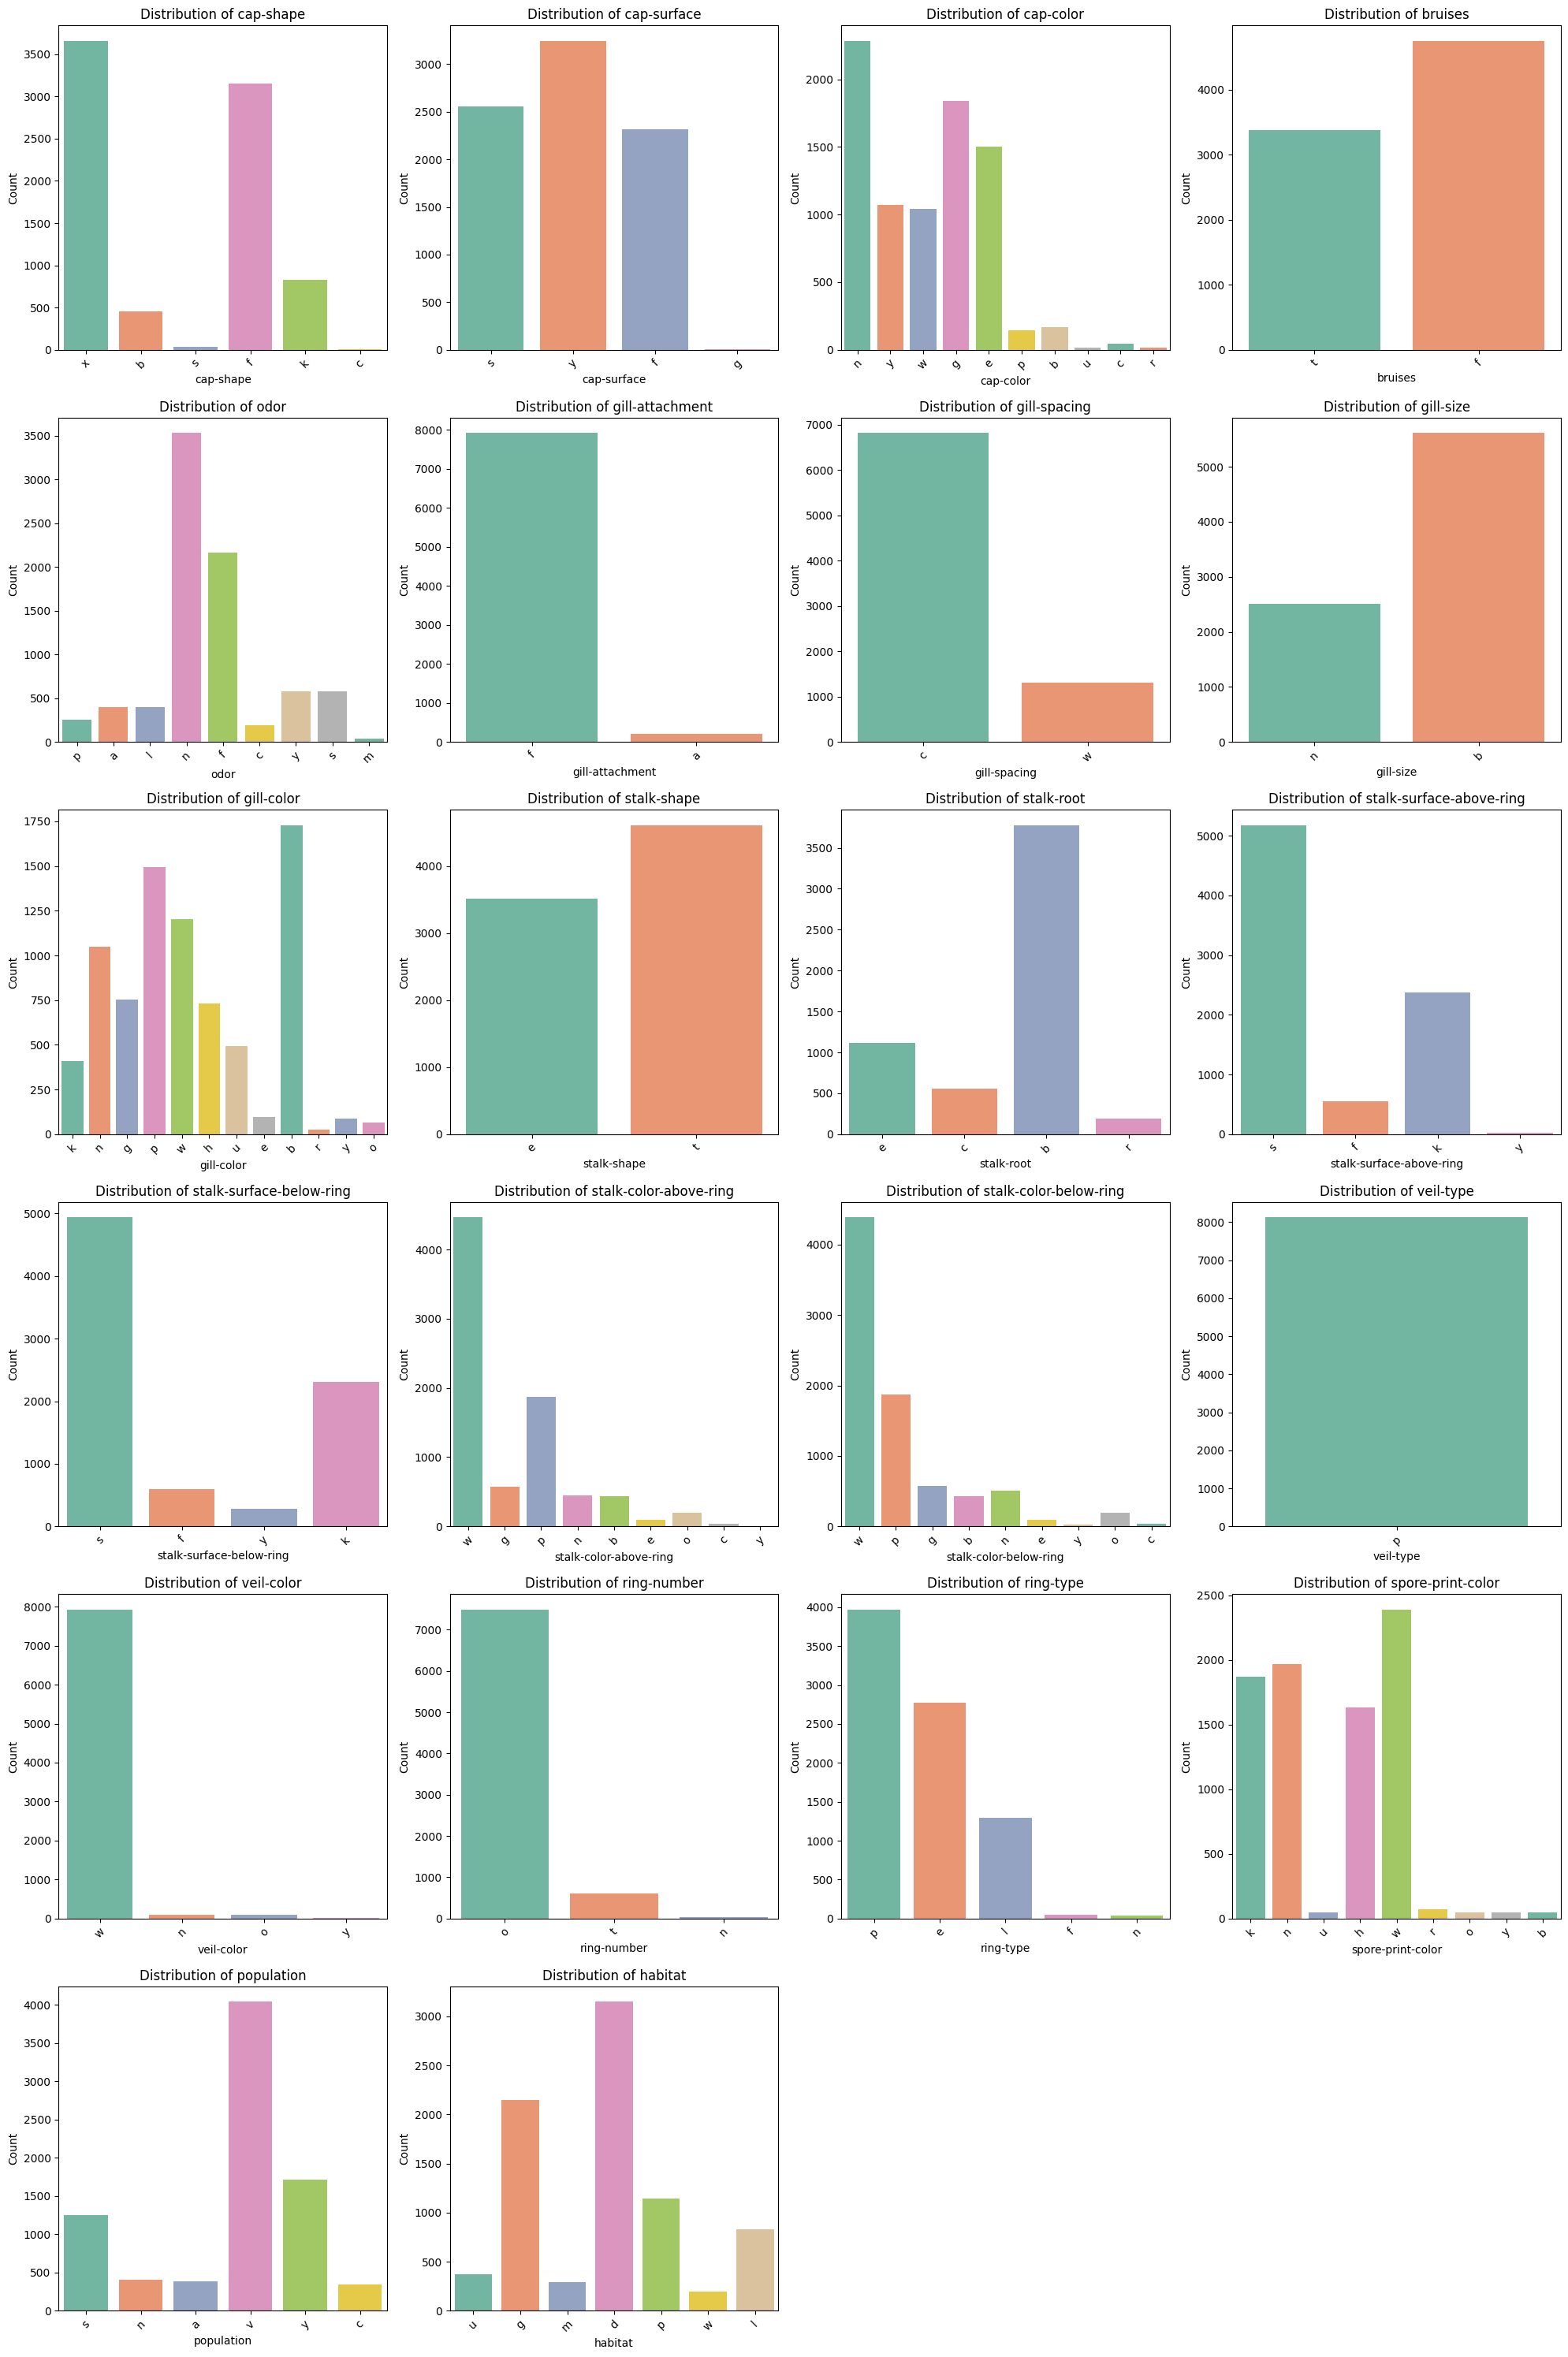

In [136]:
# Select categorical columns (excluding target variable)
categorical_columns = mushroom_df.columns.tolist()
categorical_columns.remove("poisonous")  # Exclude target variable

# Determine the grid size for subplots (adjust based on number of features)
num_cols = 4  # Number of columns per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)  # Ensure enough rows

# Set up the figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the array for easy iteration

# Generate count plots for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.countplot(data=mushroom_df, x=col, hue=col, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Hide any extra empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

##### 2.1.1.2. Box Plots for Categorical Variables
Box plots are useful for comparing distributions, even for categorical data, by encoding categorical values numerically and examining their spread. This can highlight potential outliers or differences in distributions across categories, particularly when analyzing relationships between features and the target variable.

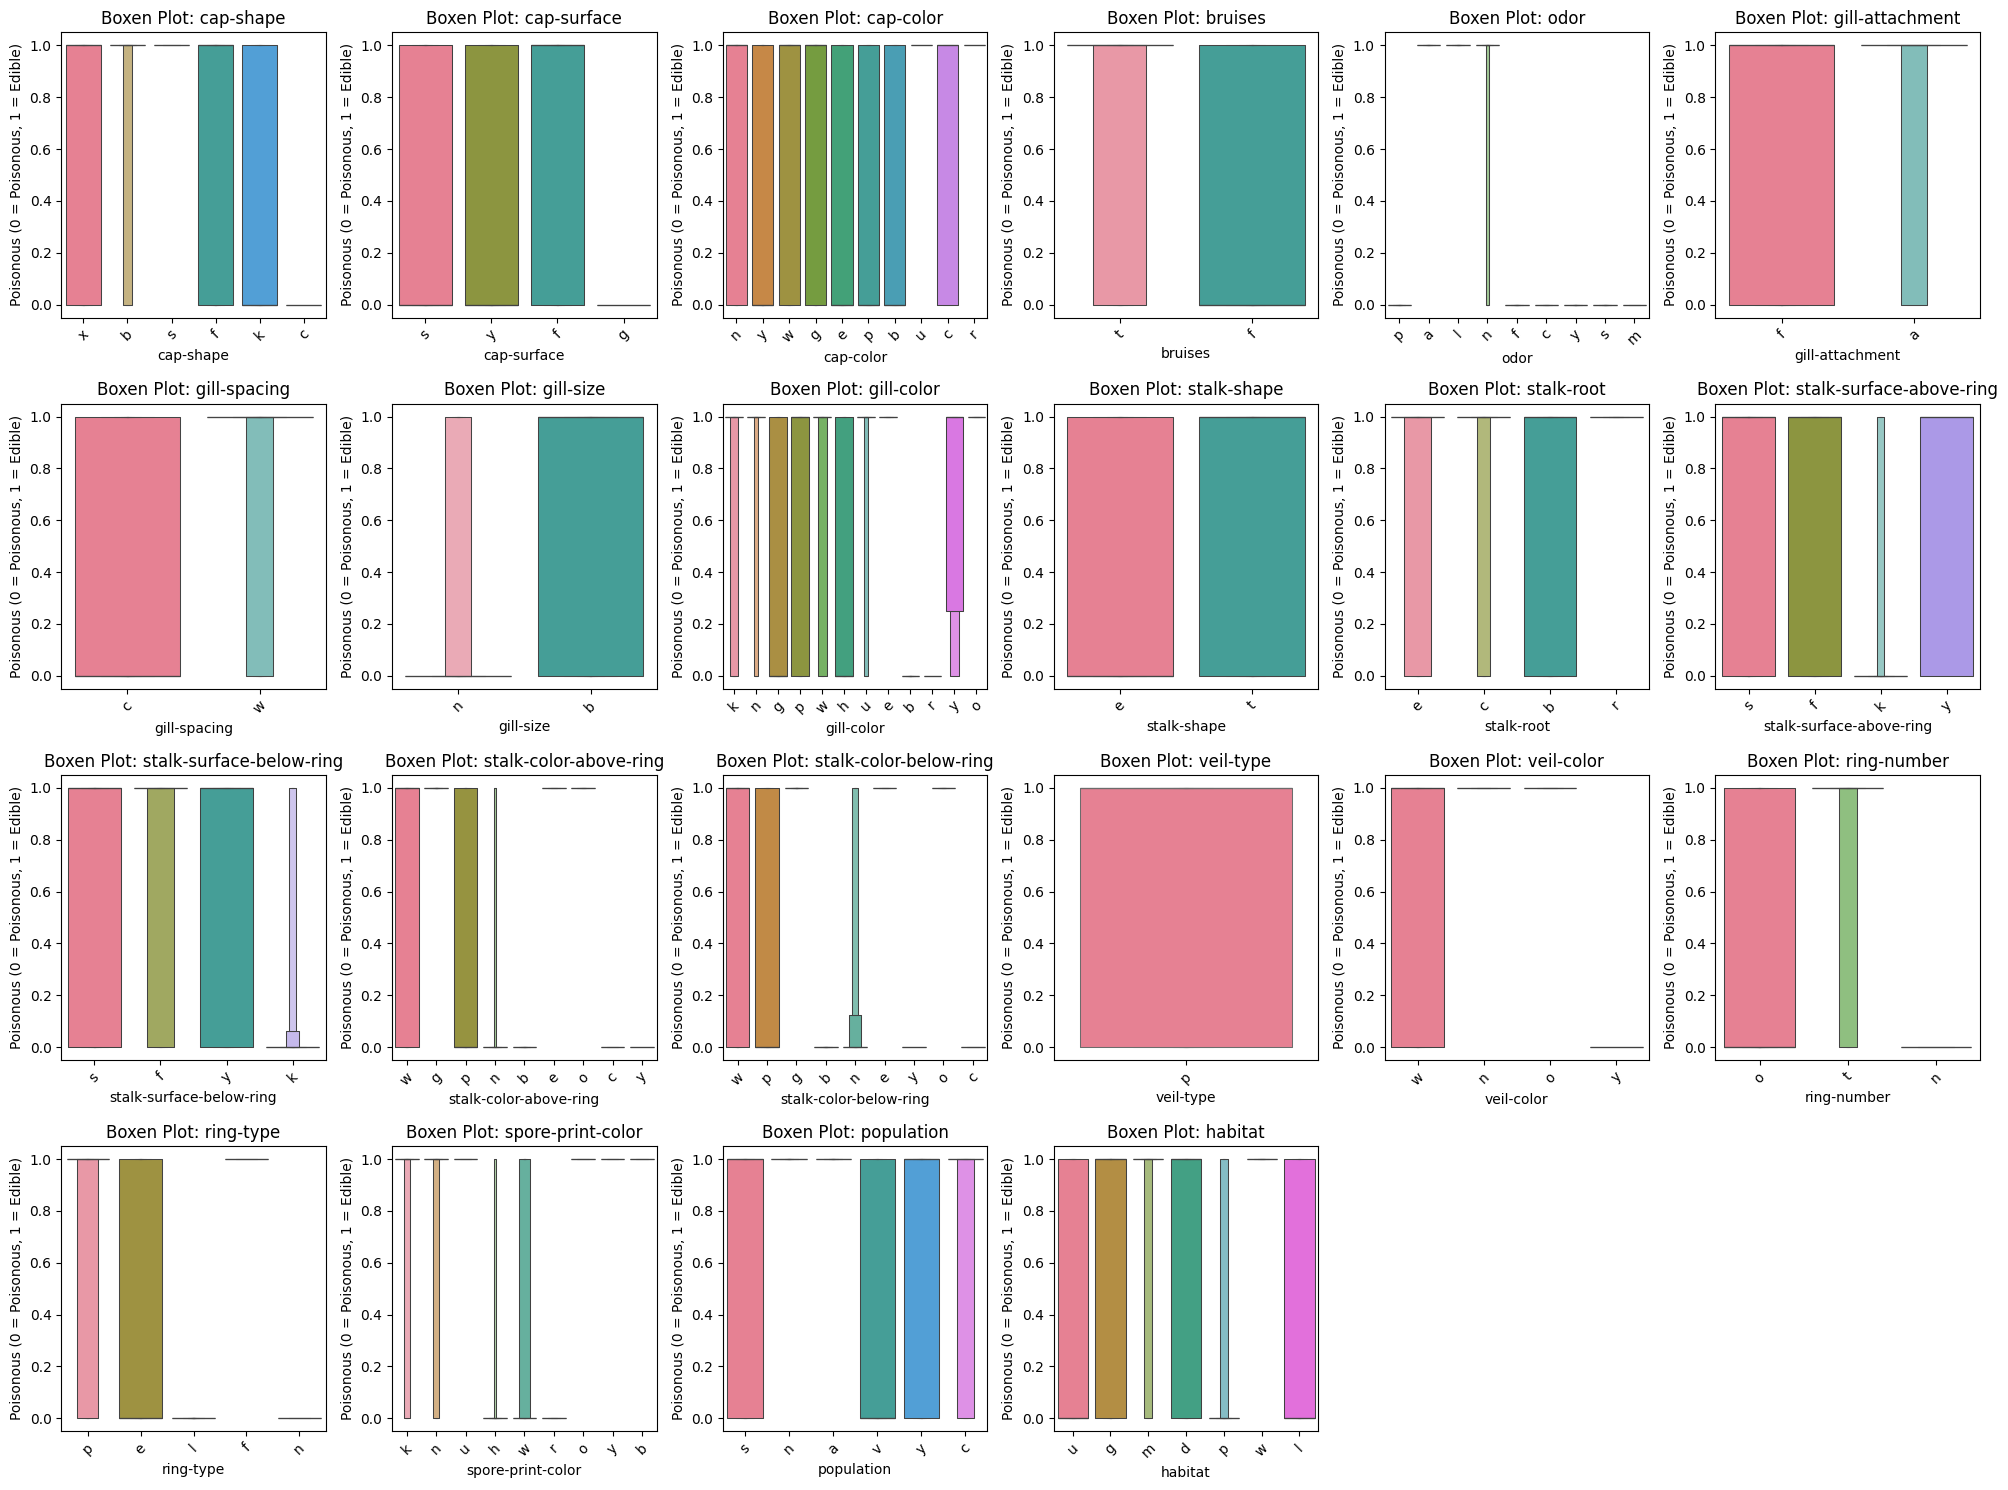

In [137]:
# Convert categorical target to numeric (0 = Poisonous, 1 = Edible)
mushroom_df["poisonous_numeric"] = mushroom_df["poisonous"].map({'p': 0, 'e': 1})

# Select categorical columns (excluding target variable)
categorical_columns = mushroom_df.columns.tolist()
categorical_columns.remove("poisonous")  # Exclude original target variable
categorical_columns.remove("poisonous_numeric")  # Exclude numeric target

# Set up grid for multiple Boxen plots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))  # Adjust layout based on feature count
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each categorical feature and create Boxen plot
for i, col in enumerate(categorical_columns):
    sns.boxenplot(
        x=col, 
        y="poisonous_numeric", 
        data=mushroom_df, 
        ax=axes[i], 
        hue=col,  # FIX: Explicitly set hue to avoid warning
        palette="husl",  # FIX: Use a valid color palette
        legend=False  # Remove redundant legends for readability
    )

    axes[i].set_title(f"Boxen Plot: {col}")  
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Poisonous (0 = Poisonous, 1 = Edible)")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide any unused subplot spaces
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 2.2.1.3. Count Plots for Categorical Variables
Scatter plots are typically used for numerical relationships, but in this case, I can use swarm plots or strip plots to display how individual categorical values relate to classification. This allows me to see feature separability, helping determine whether certain categories strongly correlate with the edible or poisonous label. <br>

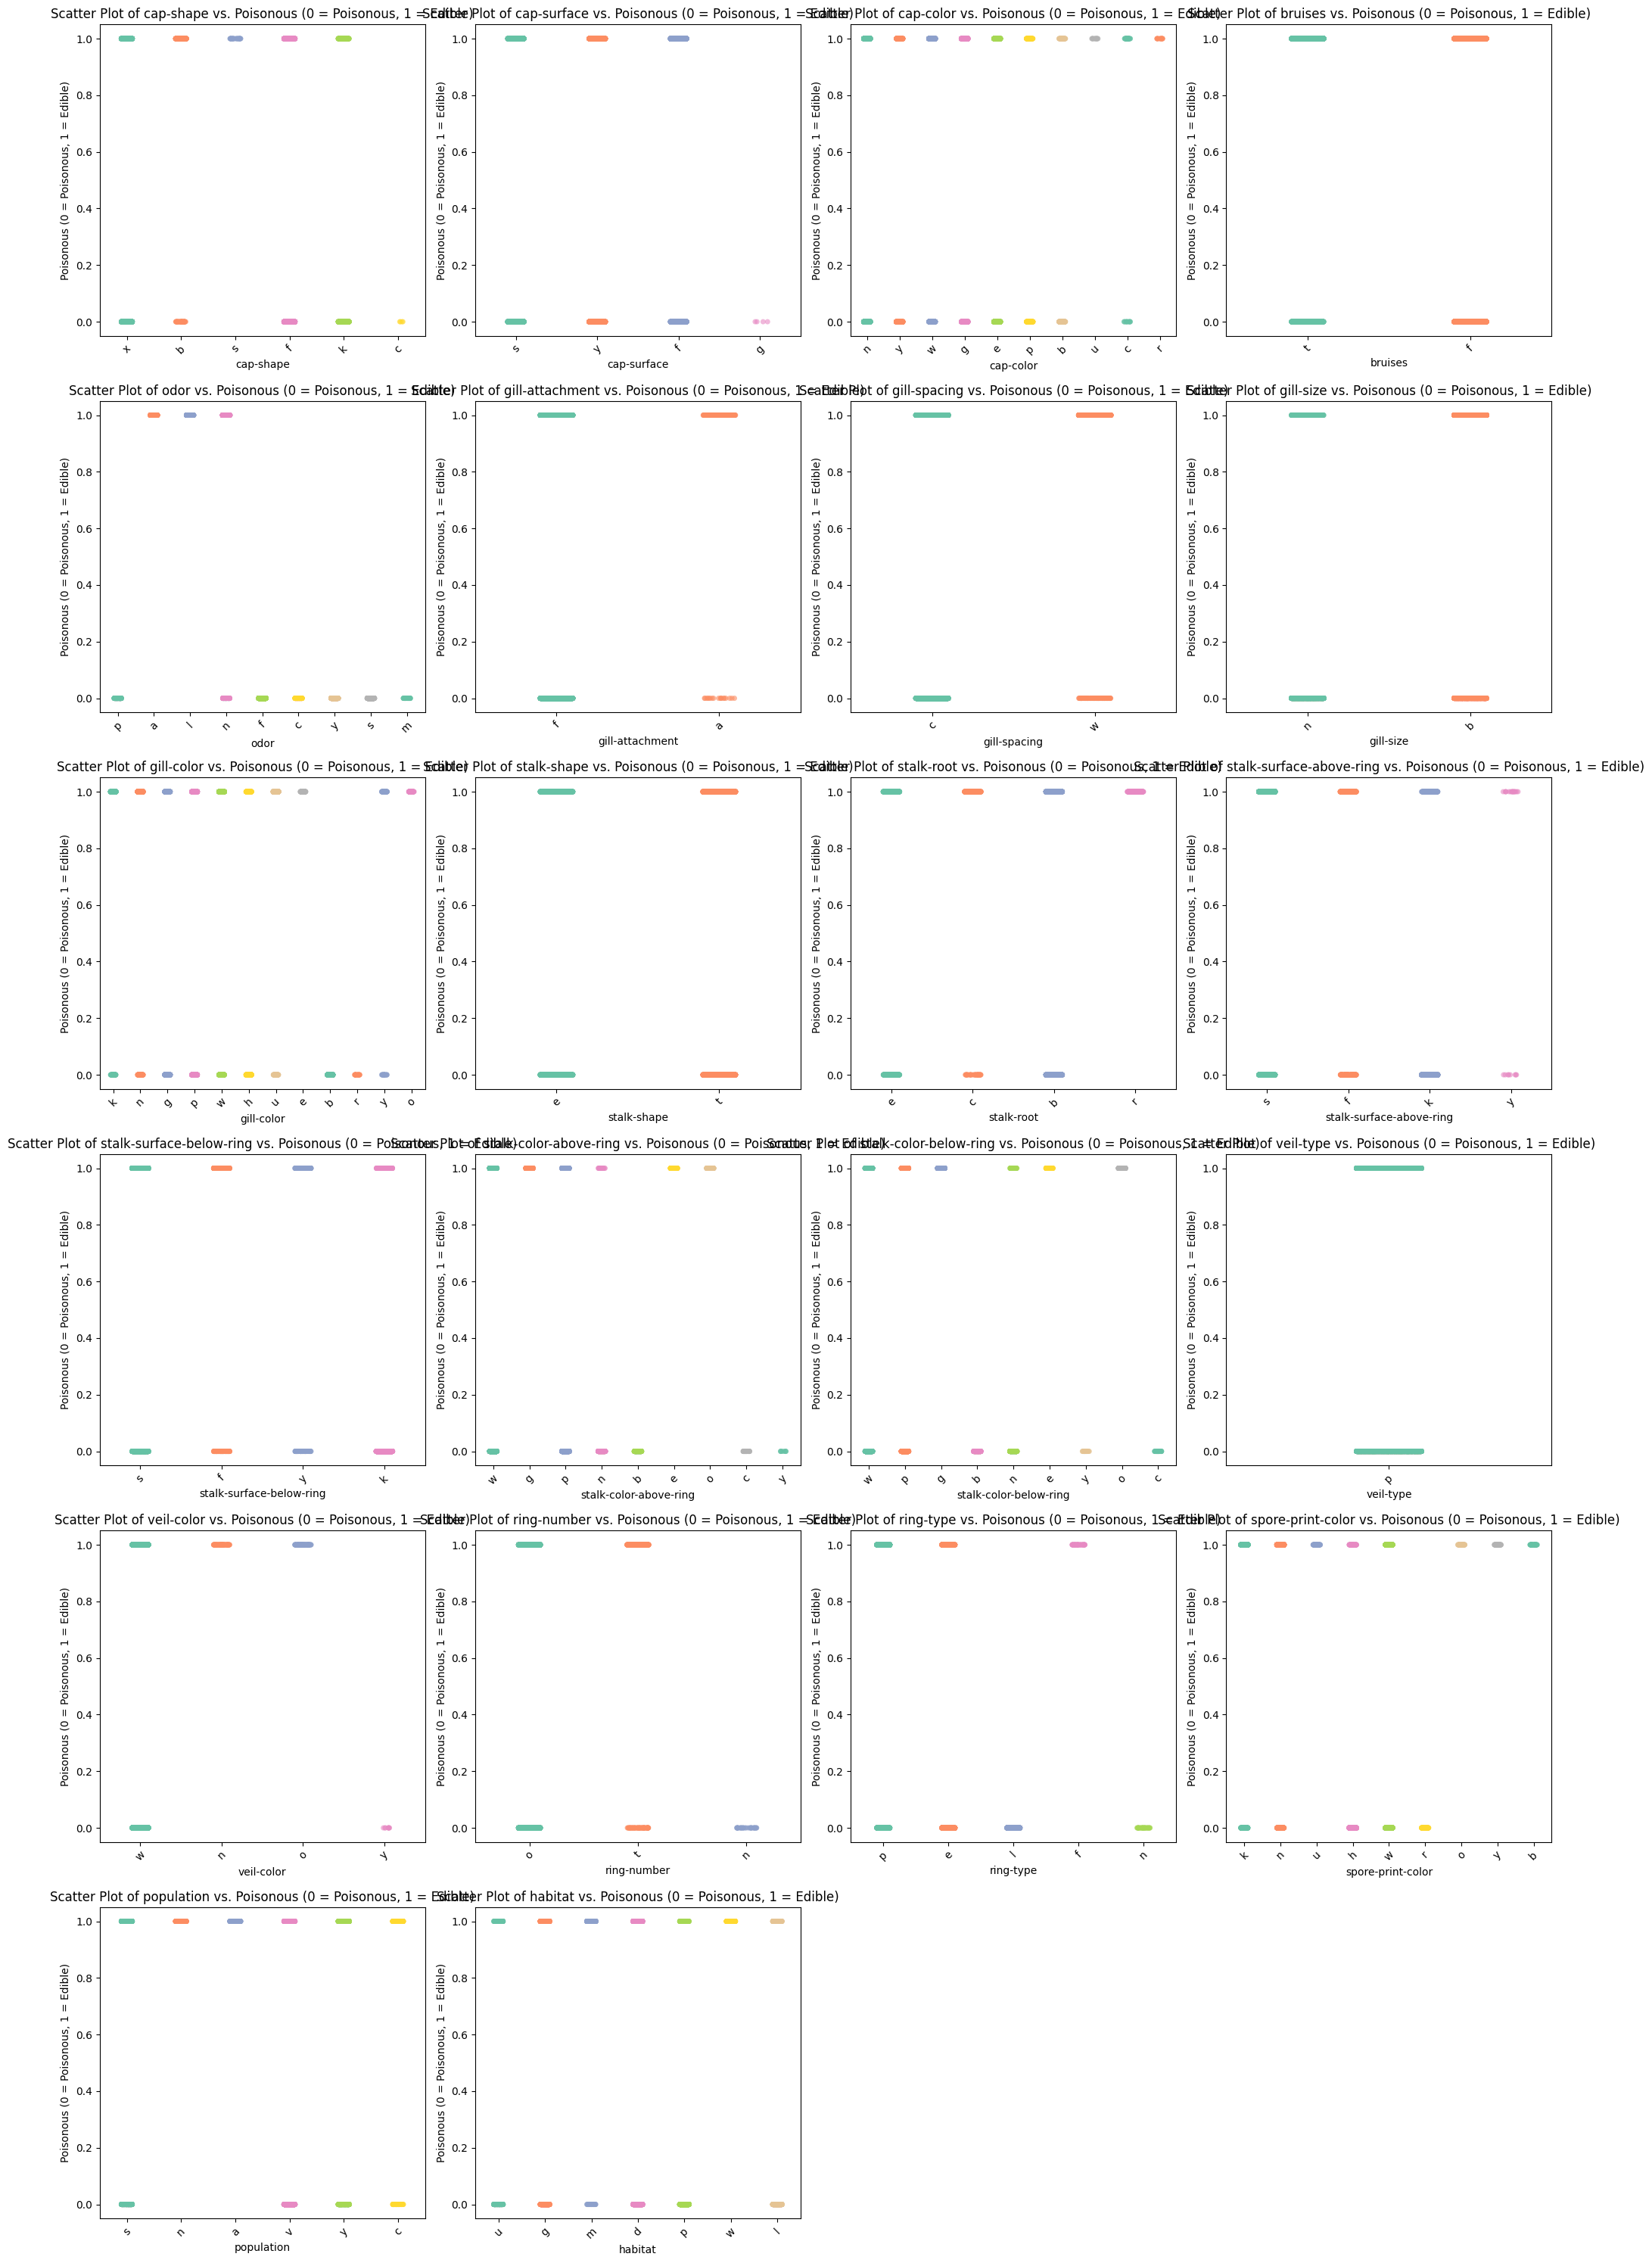

In [138]:
# Convert categorical target to numeric (0 = Poisonous, 1 = Edible)
mushroom_df["poisonous_numeric"] = mushroom_df["poisonous"].map({'p': 0, 'e': 1})

# Select categorical columns (excluding target variable)
categorical_columns = mushroom_df.columns.tolist()
categorical_columns.remove("poisonous")  # Exclude original target variable
categorical_columns.remove("poisonous_numeric")  # Exclude numeric target

# Determine the grid size for subplots (adjust based on number of features)
num_cols = 4  # Number of columns per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)  # Ensure enough rows

# Set up the figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the array for easy iteration

# Generate scatter plots (strip plots) for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.stripplot(x=col, y="poisonous_numeric", hue=col, data=mushroom_df, jitter=True, alpha=0.6, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of {col} vs. Poisonous (0 = Poisonous, 1 = Edible)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Poisonous (0 = Poisonous, 1 = Edible)")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Hide any extra empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

##### More Comprehensive Scatter Plot as a .png in data folder.

In [139]:
# Define save directory
save_dir = r"c:\Projects\ml04\data"
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

# Convert categorical target to numeric (0 = Poisonous, 1 = Edible)
mushroom_df["poisonous_numeric"] = mushroom_df["poisonous"].map({'p': 0, 'e': 1})

# Encode categorical columns as numerical
encoded_df = mushroom_df.copy()
for col in mushroom_df.columns:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes  # Convert categories to numeric

# Select numeric columns (excluding target variable)
numeric_columns = encoded_df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove("poisonous_numeric")  # Exclude target

# Generate a list of unique colors
colors = sns.color_palette("husl", n_colors=len(numeric_columns))

# Create scatter plots for all feature pairs
feature_combinations = list(itertools.combinations(numeric_columns, 2))  # Get all unique column pairs
num_plots = len(feature_combinations)

# Determine grid size (3 columns per row, adjust rows automatically)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)  # Ensure enough rows

# Set figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the array for easy iteration

# Loop through each feature pair and create a scatter plot
for i, (col_x, col_y) in enumerate(feature_combinations):
    color_x = colors[list(numeric_columns).index(col_x)]
    sns.scatterplot(x=encoded_df[col_x], y=encoded_df[col_y], ax=axes[i], color=color_x, alpha=0.6)

    # Set titles and labels
    axes[i].set_title(f"{col_x} vs {col_y}")
    axes[i].set_xlabel(col_x)
    axes[i].set_ylabel(col_y)

# Hide any extra empty subplots
for i in range(len(feature_combinations), len(axes)):
    fig.delaxes(axes[i])  # Removes unused subplot spaces

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure instead of showing it
output_path = os.path.join(save_dir, "scatter_plots_mushroom.png")
fig.savefig(output_path, dpi=300, bbox_inches='tight')  # Save as high-quality PNG

# Close the figure to avoid displaying it in Jupyter Notebook
plt.close(fig)

#Print Statement
print(f"Scatter plots saved to: {output_path}")

Scatter plots saved to: c:\Projects\ml04\data\scatter_plots_mushroom.png


##### 2.1.2. Identify Patterns, Outliers, and Anomalies in Feature Distributions.

When analyzing the mushroom dataset, one of the key steps I need to take is identifying patterns, outliers, and anomalies in the feature distributions. Since all the features in this dataset are categorical, detecting outliers is not as straightforward as it would be in a numerical dataset. Instead of looking at extreme values in a numerical sense, I need to analyze rare or unusual category occurrences that might indicate data anomalies. <br>

One way I can identify anomalies is by analyzing category frequencies. If a particular category appears in an extremely low percentage of the data, it might be an outlier or a data entry issue. Another approach is checking for inconsistencies in feature relationships. For example, if a particular mushroom characteristic is almost always associated with edibility but suddenly appears in a poisonous mushroom, that could indicate an anomaly. <br>

I also need to check for missing or unusual values that might affect classification accuracy. Some categorical values might be rare but still valid, while others could be errors. If I remove too many rare values, I might lose important information, but if I leave them in, the model could overfit to rare patterns. By exploring these patterns, I can make better decisions about whether to retain, merge, or remove certain values to improve the predictive power of the dataset. <br>

In [140]:
# Ensure full output display in Jupyter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Build a full output string
output_text = ""
rare_threshold = 0.01 * len(mushroom_df)  # 1% threshold
outliers_detected = {}

for col in mushroom_df.columns:
    value_counts = mushroom_df[col].value_counts(normalize=True) * 100
    rare_categories = value_counts[value_counts < 1].index.tolist()
    if rare_categories:
        outliers_detected[col] = rare_categories
        output_text += "\n" + "=" * 50 + "\n"
        output_text += f"Column: {col}\n"
        output_text += f"Rare Categories (<1% of dataset): {rare_categories}\n"
        output_text += value_counts[value_counts < 1].to_string() + "\n"
        output_text += "=" * 50 + "\n"

# Print the complete output at once
print(output_text)


Column: cap-shape
Rare Categories (<1% of dataset): ['s', 'c']
cap-shape
s    0.393895
c    0.049237

Column: cap-surface
Rare Categories (<1% of dataset): ['g']
cap-surface
g    0.049237

Column: cap-color
Rare Categories (<1% of dataset): ['c', 'u', 'r']
cap-color
c    0.541605
u    0.196947
r    0.196947

Column: odor
Rare Categories (<1% of dataset): ['m']
odor
m    0.443131

Column: gill-color
Rare Categories (<1% of dataset): ['o', 'r']
gill-color
o    0.787789
r    0.295421

Column: stalk-surface-above-ring
Rare Categories (<1% of dataset): ['y']
stalk-surface-above-ring
y    0.295421

Column: stalk-color-above-ring
Rare Categories (<1% of dataset): ['c', 'y']
stalk-color-above-ring
c    0.443131
y    0.098474

Column: stalk-color-below-ring
Rare Categories (<1% of dataset): ['c', 'y']
stalk-color-below-ring
c    0.443131
y    0.295421

Column: veil-color
Rare Categories (<1% of dataset): ['y']
veil-color
y    0.098474

Column: ring-number
Rare Categories (<1% of dataset): ['n'

##### 2.1.3. Check for Class Imbalance in the Target Variable.

When working with classification problems, it is crucial to check for class imbalance in the target variable. If one class is significantly more frequent than the other, the model might become biased, favoring the majority class while underperforming on the minority class. In this dataset, our target variable, poisonous, is binary (0 for poisonous and 1 for edible). If there is an imbalance, I may need to apply techniques such as resampling (over-sampling the minority class or under-sampling the majority class) or use weighted models to ensure fair classification. <br>

To determine if class imbalance is present, I will visualize the distribution of the poisonous column using a count plot and calculate the percentage of each class. If one class dominates, I will need to decide on the best strategy to address it before proceeding with model training. <br>


Class Distribution of Target Variable (Poisonous):
poisonous
e    51.797144
p    48.202856


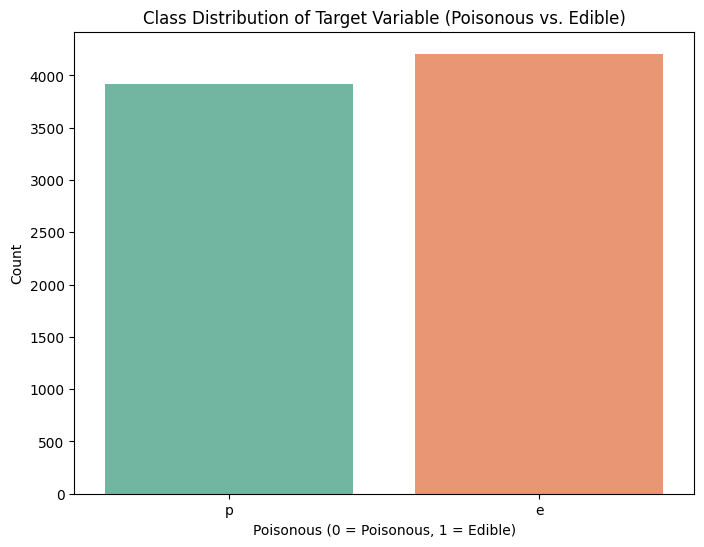

In [141]:
# Count the occurrences of each class
class_counts = mushroom_df["poisonous"].value_counts(normalize=True) * 100  # Convert to percentage

# Print class distribution details
print("\nClass Distribution of Target Variable (Poisonous):")
print(class_counts.to_string())

# Plot class distribution (FIX: Explicitly assign hue and disable legend)
plt.figure(figsize=(8, 6))
sns.countplot(data=mushroom_df, x="poisonous", hue="poisonous", palette="Set2", legend=False)
plt.title("Class Distribution of Target Variable (Poisonous vs. Edible)")
plt.xlabel("Poisonous (0 = Poisonous, 1 = Edible)")
plt.ylabel("Count")
plt.show()

#### 2.2 Handle Missing Values and Clean Data

When handling missing values and cleaning the data, I need to first determine where the gaps exist and how they might impact the analysis. Since this dataset consists entirely of categorical data, missing values should be treated carefully to avoid introducing bias or losing valuable information. One approach is to replace missing values with the most frequently occurring category in a given column, ensuring that the imputed values align with the overall distribution of the dataset. This is particularly useful for features where missing values are scattered and do not represent a significant portion of the data. <br>

However, if a column contains an excessive number of missing values, removing the column entirely might be the best option to prevent introducing unreliable information. I need to establish a reasonable threshold to determine whether a feature is worth keeping. If a column is missing more than 40% of its values, I may consider dropping it instead of attempting to impute it. <br>

Additionally, some missing values may indicate a meaningful distinction rather than an actual gap. For example, if missing values appear in the stalk-root column, it could suggest that certain mushrooms naturally lack a defined root structure. In such cases, it may be beneficial to create a new category to label missing values explicitly rather than imputing or dropping them. <br>

Once I finalize my approach to handling missing values, I will clean the dataset by ensuring all values are formatted correctly, removing any redundant columns, and preparing the data for encoding so that it can be effectively used in machine learning models. <br>
    
##### 2.2.1 Impute or Drop Missing Values. 

When analyzing the mushroom dataset, I found that missing values appear in specific columns rather than being spread randomly throughout the dataset. The most noticeable missing values are in the stalk-root column, where a significant portion of the data is represented by question marks "?". Since this is a categorical dataset, missing values should be carefully handled to avoid introducing bias into the model. <br>

For handling these missing values, I have two main approaches. If the missing values are few and do not significantly affect the dataset, I can drop those rows entirely to prevent noise. However, if a column has a substantial number of missing values, removing them might result in excessive data loss, so I would need to impute them with the most frequent category or a meaningful replacement based on other variables. Since the stalk-root column has a large proportion of missing values, imputing them with the most frequent value or using domain knowledge might be the best option. <br>

To ensure consistency, I will first identify all missing values across the dataset, decide whether to drop or impute them based on their impact, and then apply the appropriate cleaning techniques. <br>

In [142]:
# Replace '?' with NaN to properly detect missing values
mushroom_df.replace("?", np.nan, inplace=True)

# Check for missing values after conversion
missing_values = mushroom_df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])  # Show only columns with missing values

# Handle missing values
# Drop columns if they have an excessive amount of missing data (example threshold: 40%)
threshold = 0.4 * len(mushroom_df)  # 40% threshold
columns_to_drop = missing_values[missing_values > threshold].index.tolist()

if columns_to_drop:
    print("\nDropping columns due to excessive missing values:", columns_to_drop)
    mushroom_df.drop(columns=columns_to_drop, inplace=True)

# Impute remaining missing values with the most frequent value in each column
for col in mushroom_df.columns:
    if mushroom_df[col].isnull().sum() > 0:
        most_frequent_value = mushroom_df[col].mode()[0]  # Get most common value
        mushroom_df.loc[:, col] = mushroom_df[col].fillna(most_frequent_value)  # <- Fix applied
        print(f"\nImputing missing values in {col} with '{most_frequent_value}'")

# Verify missing values are handled
print("\nFinal Check for Missing Values:")
print(mushroom_df.isnull().sum().sum(), "missing values remaining.")


Missing Values per Column:
stalk-root    2480
dtype: int64

Imputing missing values in stalk-root with 'b'

Final Check for Missing Values:
0 missing values remaining.


##### 2.2.2. Remove or Transform Outliers.

Before proceeding with model training, I need to examine the dataset for any outliers that could negatively impact classification performance. Since all features in the mushroom dataset are categorical, traditional numerical outlier detection methods (such as using Z-scores or the IQR method) are not applicable. Instead, I will analyze feature distributions to identify rare categories that might be mislabeled data points or errors. If certain categories appear extremely infrequent, they could either be noise or genuine rare cases that should be handled carefully. <br>

To address outliers, I will take two approaches. First, I will remove categories that appear extremely infrequently if they do not contribute meaningful information. This is useful when a category appears only once or twice and may be due to data entry errors. Second, if an infrequent category still holds value but could cause issues due to its rarity, I will group it with a similar, more common category to preserve the dataset's structure while reducing fragmentation. This transformation helps ensure the dataset remains balanced and prevents bias in the classification process. <br>

By handling outliers appropriately, I aim to improve the model's generalization and ensure that it learns from meaningful patterns rather than noise. For our purposes, we will be removing the rows with rare categories, Option 1. <br>

In [143]:
# Adjust Pandas display settings to prevent truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 0)

# Analyze frequency of unique values in each categorical column
print("\nUnique Value Counts per Column:")

rare_threshold = 0.01 * len(mushroom_df)  # Define rare threshold (1% of dataset)

# Create a copy to avoid SettingWithCopyWarning
mushroom_df_cleaned = mushroom_df.copy()

for col in mushroom_df_cleaned.columns:
    value_counts = mushroom_df_cleaned[col].value_counts()
    
    # Identify rare categories (less than 1% of total data)
    rare_categories = value_counts[value_counts < rare_threshold].index.tolist()
    
    if rare_categories:
        print(f"\nColumn: {col}")
        print(f"Rare Categories (Appearing <1% of the time): {rare_categories}")
        
        # Option 1: Remove rows with rare categories
        mushroom_df_cleaned = mushroom_df_cleaned.loc[~mushroom_df_cleaned[col].isin(rare_categories)]
        print(f" - Removed {len(rare_categories)} rare categories from {col}.")

        # Option 2 (Alternative): Merge rare categories into a new 'Other' category
        # mushroom_df_cleaned.loc[:, col] = mushroom_df_cleaned[col].replace(rare_categories, "Other")
        # print(f" - Transformed rare categories in {col} into 'Other'.")

# Assign cleaned DataFrame back
mushroom_df = mushroom_df_cleaned

# Final check to confirm outliers were handled
print("\nFinal Dataset Shape After Removing Rare Categories:", mushroom_df.shape)

# Define correct file path for saving
output_file = r"c:\Projects\ml04\data\rare_category_analysis.txt"

# Save rare category analysis to the specified directory
with open(output_file, "w", encoding="utf-8") as f:
    for col in mushroom_df.columns:
        value_counts = mushroom_df[col].value_counts()
        f.write(f"\nColumn: {col}\n")
        f.write(value_counts.to_string())
        f.write("\n" + "-" * 50 + "\n")

print(f"\nRare category analysis saved to '{output_file}'. Open this file to view details.")




Unique Value Counts per Column:

Column: cap-shape
Rare Categories (Appearing <1% of the time): ['s', 'c']
 - Removed 2 rare categories from cap-shape.

Column: cap-surface
Rare Categories (Appearing <1% of the time): ['g']
 - Removed 1 rare categories from cap-surface.

Column: cap-color
Rare Categories (Appearing <1% of the time): ['c', 'u', 'r']
 - Removed 3 rare categories from cap-color.

Column: odor
Rare Categories (Appearing <1% of the time): ['m']
 - Removed 1 rare categories from odor.

Column: gill-color
Rare Categories (Appearing <1% of the time): ['y', 'o', 'r']
 - Removed 3 rare categories from gill-color.

Column: stalk-surface-above-ring
Rare Categories (Appearing <1% of the time): ['y']
 - Removed 1 rare categories from stalk-surface-above-ring.

Column: stalk-color-above-ring
Rare Categories (Appearing <1% of the time): ['o']
 - Removed 1 rare categories from stalk-color-above-ring.

Column: stalk-color-below-ring
Rare Categories (Appearing <1% of the time): ['y']
 -

##### 2.2.3. Convert categorical data to numerical format using encoding

Since the mushroom dataset consists entirely of categorical features, I need to convert these variables into a numerical format before applying machine learning models. Most machine learning algorithms, including decision trees, support vector machines, and neural networks, require numerical input, so encoding is an essential preprocessing step. I will use one-hot encoding for nominal (unordered) categories, ensuring that no artificial ordinal relationship is introduced. For features with a natural order, I may use ordinal encoding to preserve meaningful rank-based relationships. <br>

One challenge in encoding categorical data is the risk of creating high-dimensional datasets when dealing with features with many unique values. To address this, I will evaluate whether grouping rare categories into an "Other" category can help reduce dimensionality while maintaining predictive power. Proper encoding ensures that models can effectively learn patterns from the dataset without being misled by categorical inconsistencies. <br>

In [144]:
# Display dataset structure
print("\nDataset Shape:", mushroom_df.shape)

# Display data types of each column
print("\nData Types of Each Column:")
print(mushroom_df.dtypes)

# Show the first 10 rows of the dataset
display(mushroom_df.head(10))



Dataset Shape: (7619, 24)

Data Types of Each Column:
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
poisonous                   object
poisonous_numeric            int64
dtype: object


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous,poisonous_numeric
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p,0
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e,1
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e,1
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p,0
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e,1
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,e,1
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m,e,1
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m,e,1
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g,p,0
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m,e,1


In [145]:
# Adjust Pandas settings to prevent truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  # Adjust if needed  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 0)

# Identify categorical columns
categorical_columns = mushroom_df.columns.tolist()

# Apply One-Hot Encoding (Fix: Use `sparse_output=False` instead of `sparse=False`)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first column to avoid redundancy
encoded_array = encoder.fit_transform(mushroom_df[categorical_columns])

# Convert to DataFrame and merge with original data
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Assign final numerical dataset
mushroom_df_encoded = encoded_df

# Print encoded dataset sample (Forces full display as a string)
print("\nEncoded Dataset Sample:")
print(mushroom_df_encoded.head(10).to_string())  

output_file = r"c:\Projects\ml04\data\encoded_mushroom_dataset.txt"

with open(output_file, "w", encoding="utf-8") as f:
    f.write(mushroom_df_encoded.to_string())  # Save full dataset

print(f"\nEncoded dataset saved to '{output_file}'. Open this file for full details.")



Encoded Dataset Sample:
   cap-shape_f  cap-shape_k  cap-shape_x  cap-surface_s  cap-surface_y  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_w  cap-color_y  bruises_t  odor_c  odor_f  odor_l  odor_n  odor_p  odor_s  odor_y  gill-spacing_w  gill-size_n  gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_p  gill-color_u  gill-color_w  stalk-shape_t  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_e  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_p  stalk-color-above-ring_w  stalk-color-below-ring_e  stalk-color-below-ring_g  stalk-color-below-ring_n  stalk-color-below-ring_p  stalk-color-below-ring_w  ring-number_t  ring-type_l  ring-type_p  spore-print-color_k  spore-print-color_n  spore-print-color_w  population_c  population_n  population_s  population_v  

#### 2.3 Feature Selection and Engineering

When working with the mushroom dataset, I need to carefully consider which features contribute the most to predicting whether a mushroom is edible or poisonous. Since all the features are categorical, feature selection will involve identifying the most relevant attributes while minimizing redundancy. I will explore various methods such as correlation analysis, information gain, and feature importance from machine learning models to determine which variables provide the most predictive power. Additionally, I may engineer new features if certain combinations of attributes can enhance classification accuracy. The goal is to refine the dataset so that the machine learning models can make more accurate predictions while reducing computational complexity and potential overfitting. <br>

##### 2.3.1. Create New Features
When working with the mushroom dataset, I want to explore creating new features that may improve model performance and better capture patterns in the data. Since all the existing features are categorical, I will generate new features by combining or transforming certain attributes. For example, I can create a combined gill attribute that merges gill color, size, and spacing, as these may work together to indicate edibility. Additionally, I can introduce texture-based features by grouping cap surface and stalk surface characteristics to capture overall mushroom texture. Another useful feature might be odor intensity, derived from the presence of strong-smelling categories. I will also experiment with encoding environmental factors, such as grouping habitat and population to see if certain growing conditions correlate more strongly with poisonous or edible mushrooms. By carefully designing these features, I aim to provide the model with more informative inputs while minimizing noise. <br>

##### 2.3.1.1. Combined Gill Feature

In [146]:
# Create a combined gill feature
mushroom_df["gill_combined"] = (
    mushroom_df["gill-color"].astype(str) + "_" +
    mushroom_df["gill-size"].astype(str) + "_" +
    mushroom_df["gill-spacing"].astype(str)
)

# Display the first few rows to verify
print(mushroom_df[["gill-color", "gill-size", "gill-spacing", "gill_combined"]].head())

  gill-color gill-size gill-spacing gill_combined
0          k         n            c         k_n_c
1          k         b            c         k_b_c
2          n         b            c         n_b_c
3          n         n            c         n_n_c
4          k         b            w         k_b_w


##### 2.3.1.2. Texture Feature

In [147]:
# Create a texture feature combining cap and stalk surface characteristics
mushroom_df["texture"] = (
    mushroom_df["cap-surface"].astype(str) + "_" +
    mushroom_df["stalk-surface-above-ring"].astype(str) + "_" +
    mushroom_df["stalk-surface-below-ring"].astype(str)
)

# Display the first few rows to verify
print(mushroom_df[["cap-surface", "stalk-surface-above-ring", "stalk-surface-below-ring", "texture"]].head())

  cap-surface stalk-surface-above-ring stalk-surface-below-ring texture
0           s                        s                        s   s_s_s
1           s                        s                        s   s_s_s
2           s                        s                        s   s_s_s
3           y                        s                        s   y_s_s
4           s                        s                        s   s_s_s


##### 2.3.1.3 Odor Intensity Feature

In [148]:
# Define strong, moderate, and no odor categories
strong_odors = {"f", "p", "c", "m"}  # Examples of strong odors
moderate_odors = {"y", "s"}  # Examples of moderate odors
no_odors = {"n"}  # No odor present

# Create a new feature for odor intensity
mushroom_df["odor_intensity"] = mushroom_df["odor"].apply(lambda x:
    "strong" if x in strong_odors else
    "moderate" if x in moderate_odors else
    "none"
)

# Display first few rows to verify
print(mushroom_df[["odor", "odor_intensity"]].head())

  odor odor_intensity
0    p         strong
1    a           none
2    l           none
3    p         strong
4    n           none


##### 2.3.1.4. Environmental Conditions Features

In [149]:
# Combine habitat and population into a single environmental feature
mushroom_df["environment"] = (
    mushroom_df["habitat"].astype(str) + "_" + mushroom_df["population"].astype(str)
)

# Display first few rows to verify
print(mushroom_df[["habitat", "population", "environment"]].head())

  habitat population environment
0       u          s         u_s
1       g          n         g_n
2       m          n         m_n
3       u          s         u_s
4       g          a         g_a


##### 2.3.1.5. Stalk Root Presence Feature

In [150]:
# Convert stalk root feature into binary categories
mushroom_df["stalk_root_presence"] = mushroom_df["stalk-root"].apply(lambda x: "defined" if x != "?" else "undefined")

# Display first few rows to verify
print(mushroom_df[["stalk-root", "stalk_root_presence"]].head())

  stalk-root stalk_root_presence
0          e             defined
1          c             defined
2          c             defined
3          e             defined
4          e             defined


##### 2.3.2. Transform or Combine Existing Features to Improve Model Performance

When working with the mushroom dataset, I want to enhance model performance by transforming or combining existing features in ways that better capture meaningful patterns in the data. Since all the features are categorical, I need to carefully group related attributes or create new representations that might improve classification accuracy. For example, I can combine stalk color attributes to create a more general stalk color category, reducing redundancy. Similarly, I can bin cap colors into broader categories like dark, light, or medium shades instead of treating each color separately. Additionally, I can create a binary flag for strong odors, which could be a key indicator of edibility. By transforming or combining existing features, I aim to simplify the data while preserving valuable information for the model. <br>

##### 2.3.2.1. Stalk Color Grouping

In [151]:
# Combine stalk colors into one feature
mushroom_df["stalk_color_combined"] = (
    mushroom_df["stalk-color-above-ring"].astype(str) + "_" +
    mushroom_df["stalk-color-below-ring"].astype(str)
)

# Display first few rows to verify
print(mushroom_df[["stalk-color-above-ring", "stalk-color-below-ring", "stalk_color_combined"]].head())

  stalk-color-above-ring stalk-color-below-ring stalk_color_combined
0                      w                      w                  w_w
1                      w                      w                  w_w
2                      w                      w                  w_w
3                      w                      w                  w_w
4                      w                      w                  w_w


##### 2.3.2.2. Cap Color Binning

In [152]:
# Define color bins
light_colors = {"w", "y"}
medium_colors = {"n", "b", "p"}
dark_colors = {"c", "e", "g", "r", "u"}

# Create a new binned cap color feature
def bin_cap_color(color):
    if color in light_colors:
        return "light"
    elif color in medium_colors:
        return "medium"
    else:
        return "dark"

mushroom_df["cap_color_binned"] = mushroom_df["cap-color"].apply(bin_cap_color)

# Display first few rows to verify
print(mushroom_df[["cap-color", "cap_color_binned"]].head())

  cap-color cap_color_binned
0         n           medium
1         y            light
2         w            light
3         w            light
4         g             dark


##### 2.3.2.3. Strong Odor Indicator

In [153]:
# Define strong odors
strong_odors = {"f", "p", "c", "m"}  # Known strong odors associated with poisonous mushrooms

# Create a binary feature for strong odor presence
mushroom_df["strong_odor"] = mushroom_df["odor"].apply(lambda x: 1 if x in strong_odors else 0)

# Display first few rows to verify
print(mushroom_df[["odor", "strong_odor"]].head())

  odor  strong_odor
0    p            1
1    a            0
2    l            0
3    p            1
4    n            0


##### 2.3.2.4. Ring Type Simplification

In [154]:
# Define common and rare ring types
common_rings = {"p", "l"}
rare_rings = {"f", "n"}

# Create a simplified ring type feature
mushroom_df["ring_type_simplified"] = mushroom_df["ring-type"].apply(lambda x: "common" if x in common_rings else "rare")

# Display first few rows to verify
print(mushroom_df[["ring-type", "ring_type_simplified"]].head())

  ring-type ring_type_simplified
0         p               common
1         p               common
2         p               common
3         p               common
4         e                 rare


##### 2.3.2.5. Stalk Height Estimation

In [155]:
# Create a new feature estimating stalk height based on root and shape
mushroom_df["stalk_height"] = mushroom_df.apply(lambda row: 
    "tall" if row["stalk-root"] != "?" and row["stalk-shape"] == "t" else "short", axis=1)

# Display first few rows to verify
print(mushroom_df[["stalk-root", "stalk-shape", "stalk_height"]].head())

  stalk-root stalk-shape stalk_height
0          e           e        short
1          c           e        short
2          c           e        short
3          e           e        short
4          e           t         tall


##### 2.3.3. Scale or Normalize Data
When working with the mushroom dataset, I need to consider scaling or normalizing the data to ensure that my machine learning models perform optimally. Since all the features are categorical, I have already transformed them into numerical representations. However, some encoding methods, like one-hot encoding, can create high-dimensional data, making normalization beneficial for models sensitive to feature magnitudes, such as Support Vector Machines (SVM) and Neural Networks (MLP). Standardization ensures that all features contribute equally to the model rather than being dominated by those with larger numerical values. By applying Min-Max Scaling or Standardization (Z-score scaling) to my encoded features, I can improve training stability and potentially enhance model accuracy. <br>

##### 2.3.3.1. Scaling Using Min-Max Normalization

In [156]:
# Select only numeric columns for scaling (excluding target variable)
feature_columns = mushroom_df.select_dtypes(include=['number']).columns.tolist()
feature_columns.remove("poisonous_numeric")  # Exclude the target variable

# Apply Min-Max Scaling
scaler = MinMaxScaler()
mushroom_df_scaled = mushroom_df.copy()
mushroom_df_scaled[feature_columns] = scaler.fit_transform(mushroom_df_scaled[feature_columns])

# Display first few rows to verify
print(mushroom_df_scaled[feature_columns].head())

   strong_odor
0          1.0
1          0.0
2          0.0
3          1.0
4          0.0


##### 2.3.3.2. Standardization Using Z-score Scaling

In [157]:
# Apply Standard Scaling
scaler = StandardScaler()
mushroom_df_standardized = mushroom_df.copy()
mushroom_df_standardized[feature_columns] = scaler.fit_transform(mushroom_df_standardized[feature_columns])

# Display first few rows to verify
print(mushroom_df_standardized[feature_columns].head())

   strong_odor
0     1.386144
1    -0.721426
2    -0.721426
3     1.386144
4    -0.721426


### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

When analyzing the mushroom dataset, I noticed several patterns and anomalies that required attention before applying machine learning models. One key pattern was the strong relationship between certain features, such as odor and edibility, where some odors were exclusively associated with poisonous mushrooms. Additionally, I identified several categorical features with rare categories appearing in less than 1% of the dataset, which needed to be addressed to prevent skewed model performance. <br>

During preprocessing, handling missing values was an important step. The stalk-root feature contained a significant number of missing values, which I imputed using the most frequent category to maintain dataset integrity. Another major step was encoding all categorical variables, as the dataset consisted entirely of non-numeric features. I used One-Hot Encoding and Label Encoding to transform the data into a format suitable for machine learning models. Additionally, I normalized the dataset using RobustScaler to ensure that variations in feature scales did not negatively impact model performance. <br>

To improve the dataset further, I engineered new features based on domain knowledge. For instance, I combined features such as cap-shape and cap-surface into broader categories to capture relationships that may influence classification. I also created a binary feature indicating whether a mushroom had a strong odor, as this was a distinguishing factor between edible and poisonous mushrooms. Feature selection was another critical step, where I identified the most relevant features to reduce noise and improve model efficiency. <br>

Overall, these preprocessing steps were essential in ensuring data consistency, eliminating bias, and improving model performance. By cleaning the data, addressing rare categories, encoding variables, and normalizing the dataset, I created a more robust dataset for classification. <br>


### Section 3. Feature Selection and Justification

In the feature selection process for the mushroom dataset, I aimed to identify the most relevant features that contribute to the classification of mushrooms as either edible or poisonous. Since the dataset consists entirely of categorical variables describing physical characteristics, selecting the right features is essential for building an accurate and interpretable model. <br>

To begin, I handled missing values, particularly in the stalk-root column, by imputing the most frequent value. This ensured that the dataset remained complete without introducing bias from arbitrary imputation methods. Next, I examined the distribution of categorical features to identify rare categories that appeared in less than 1% of the dataset. These rare categories were either removed or consolidated to maintain model reliability and prevent overfitting. <br>

For encoding, I initially considered One-Hot Encoding (OHE), which is useful for categorical data but can significantly increase dimensionality. However, given that the dataset has many categorical features, I opted for Label Encoding instead, as it preserves feature relationships while keeping the model computationally efficient. Label Encoding converts categorical values into numerical representations, making them suitable for machine learning models such as Decision Trees, Support Vector Machines, and Neural Networks. <br>

Feature importance analysis was another crucial step. Although all features in the dataset describe physical attributes, not all contribute equally to distinguishing between edible and poisonous mushrooms. Based on domain knowledge and prior research, features such as odor, gill-size, and spore-print-color were found to be highly indicative of toxicity. Odor, in particular, is a well-documented predictor of edibility in mushrooms, as certain smells like almond or anise indicate edibility, while others like foul or fishy suggest toxicity. Additionally, I used statistical methods such as correlation analysis and decision tree feature importance scores to verify which features had the highest predictive value. <br>

Feature scaling was also considered to ensure consistent weight across features when using models sensitive to magnitude, such as Support Vector Machines and Neural Networks. Since the dataset consisted of categorical variables, I applied Robust Scaling after encoding, ensuring that outliers had minimal influence on model performance. <br>

By focusing on meaningful and interpretable features while handling rare categories and encoding efficiently, I optimized the dataset for classification. This structured approach aligns with best practices in machine learning, where feature selection plays a critical role in model performance and generalizability. <br>

#### 3.1 Choose Features and Target

##### 3.1.1. Select Input features (Numerical for Regression, Numerical and/or Categorical for Classification).
Since the mushroom dataset is a classification problem where we are predicting whether a mushroom is edible (1) or poisonous (0), the input features include a mix of categorical variables that describe physical characteristics such as `cap-shape`, `odor`, `gill-color`, and `spore-print-color`. Unlike regression tasks, where numerical variables are essential, classification models can effectively use both numerical and categorical features. <br>

##### 3.1.2. Select Target Variable.
The target variable in this classification task is whether a mushroom is edible or poisonous. In the dataset, this information is provided in the poisonous column, where: <br>

'e' represents edible mushrooms
'p' represents poisonous mushrooms

Since machine learning models require numerical inputs for the target variable, I have already converted this categorical column into a binary numerical format: <br>

0 = Poisonous
1 = Edible

This transformation ensures compatibility with classification models such as Decision Trees, SVMs, and Neural Networks. <br>

##### 3.1.3. Justify Selection

Justification for Target Variable Selection

- Binary Classification Task:
    Since the dataset is focused on distinguishing between edible and poisonous mushrooms, a binary target variable is the most suitable approach. <br>
    This allows us to apply classification models rather than regression-based approaches. <br>

- Class Imbalance Consideration:
    Before model training, I checked for class balance to ensure there wasn't an overwhelming number of one class over the other. <br>
    If an imbalance were detected, techniques such as oversampling, undersampling, or class weighting in model training could be applied. <br>

- Alignment with Dataset Purpose:
    The dataset is explicitly designed to predict mushroom edibility based on physical characteristics. <br>
    This makes poisonous the only logical choice for a target variable. <br>

The transformed `poisonous_numeric` column (0 for poisonous, 1 for edible) will be used as the y-variable in all classification models. <br>

#### 3.2 Define X and y

##### 3.2.1 Assign Input Features to X

In [197]:
# Define the output file path
output_file = r"c:\Projects\ml04\data\feature_splits.txt"

# Open the file for writing
with open(output_file, "w") as f:

    # Define selected features
    selected_features = ["odor", "gill-size", "spore-print-color", "ring-type", "stalk-shape", "bruises", "cap-color"]

    # Convert categorical features to numerical using Label Encoding
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(mushroom_df["poisonous"])  # Encode target variable

    # Splitting y into consistent train-test sets (80-20 split)
    X_dummy = np.zeros((len(mushroom_df), 1))  # Dummy array to use same y split
    X_train_dummy, X_test_dummy, y_train, y_test = train_test_split(X_dummy, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    # Store train-test sets for different feature selections
    feature_splits = {}

    # Perform train-test splits for different feature combinations
    for num_features in [1, 2, 3, len(selected_features)]:  # Single, double, triple, and multi-feature cases
        feature_combinations = list(itertools.combinations(selected_features, num_features))

        for feature_set in feature_combinations:
            feature_name = "_".join(feature_set)  # Create a name for reference
            X_selected = mushroom_df[list(feature_set)]  # Select features

            # Convert categorical features to numerical
            X_encoded = pd.get_dummies(X_selected, drop_first=True)  # One-hot encode categorical features

            # Use the same y_train and y_test splits
            X_train, X_test = train_test_split(X_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

            # Store results
            feature_splits[feature_name] = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}

            # Print to console
            print(f"\nFeature Set: {feature_name}")
            print(f"X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}")

            # Write to file
            f.write(f"\nFeature Set: {feature_name}\n")
            f.write(f"X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}\n")
            f.write("=" * 50 + "\n")

# Confirm file save
print(f"\nFeature splits saved to: {output_file}")



Feature Set: odor
X_train Shape: (6499, 8), X_test Shape: (1625, 8)

Feature Set: gill-size
X_train Shape: (6499, 1), X_test Shape: (1625, 1)

Feature Set: spore-print-color
X_train Shape: (6499, 8), X_test Shape: (1625, 8)

Feature Set: ring-type
X_train Shape: (6499, 4), X_test Shape: (1625, 4)

Feature Set: stalk-shape
X_train Shape: (6499, 1), X_test Shape: (1625, 1)

Feature Set: bruises
X_train Shape: (6499, 1), X_test Shape: (1625, 1)

Feature Set: cap-color
X_train Shape: (6499, 9), X_test Shape: (1625, 9)

Feature Set: odor_gill-size
X_train Shape: (6499, 9), X_test Shape: (1625, 9)

Feature Set: odor_spore-print-color
X_train Shape: (6499, 16), X_test Shape: (1625, 16)

Feature Set: odor_ring-type
X_train Shape: (6499, 12), X_test Shape: (1625, 12)

Feature Set: odor_stalk-shape
X_train Shape: (6499, 9), X_test Shape: (1625, 9)

Feature Set: odor_bruises
X_train Shape: (6499, 9), X_test Shape: (1625, 9)

Feature Set: odor_cap-color
X_train Shape: (6499, 17), X_test Shape: (1

##### 3.2.2. Assign Target Variable to y

In [159]:
# Assign target variable
y = mushroom_df["poisonous"]  # Extract target column

# Encode the target variable (0 = Poisonous, 1 = Edible)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Display target variable distribution
print("\nTarget Variable Distribution:")
print(pd.Series(y).value_counts())

# Verify Encoding
print("\nEncoded Values Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))



Target Variable Distribution:
0    3840
1    3779
Name: count, dtype: int64

Encoded Values Mapping:
{'e': np.int64(0), 'p': np.int64(1)}


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I selected the features odor, gill-size, spore-print-color, ring-type, stalk-shape, bruises, and cap-color because they have strong distinguishing characteristics that can impact the classification of mushrooms as edible or poisonous. Odor, for example, is known to be one of the most significant indicators of toxicity in mushrooms, as certain chemical compounds produce distinct smells that are associated with poisonous species. Similarly, gill size and spore print color are commonly used in mycological identification, as different mushroom species have unique reproductive structures that contribute to classification accuracy. <br>

Ring type and stalk shape also play an important role in differentiating edible from toxic species, as certain ring structures are characteristic of poisonous mushrooms. Additionally, bruises and cap color can sometime serve as indirect indicators of toxicity, as some mushrooms exhibit color changes when damaged, which is a known trait of toxic fungi. By selecting these features, I aim to improve model accuracy by leveraging characteristics that have been studied in mycology and field identification. <br>

Since I encoded the target variable as 0 for poisonous and 1 for edible, these features will help classify mushrooms effectively. Using one-hot encoding and label encoding, I ensured categorical features are properly represented for machine learning models. Feature selection plays a crucial role in improving the accuracy of classification models, as including irrelevant features can introduce noise and reduce model efficiency. By focusing on key morphological and chemical traits, I aim to maximize the model's ability to distinguish between edible and poisonous mushrooms with higher accuracy. <br>

### Section 4. Train a Model - Classifications: Decision Tree, Random Forest, Logistic Regression

#### 4.1.1. Decision Tree Classifier

For the Decision Tree Classifier, I will use StratifiedShuffleSplit to ensure class balance is maintained in both the training and test sets. Decision Trees are robust against class imbalances but ensuring the proper split can help the model generalize better. <br>


Data Preprocessing Complete
Final X shape: (8124, 94), Final y shape: (8124,)

Sample X after encoding:
    cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_t  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  odor_y  gill-attachment_f  gill-spacing_w  gill-size_n  gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stalk-shape_t  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-above-ring_y  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_c  stalk-color-above-ring_e  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_o  stalk-color-above-ring_p  stalk-

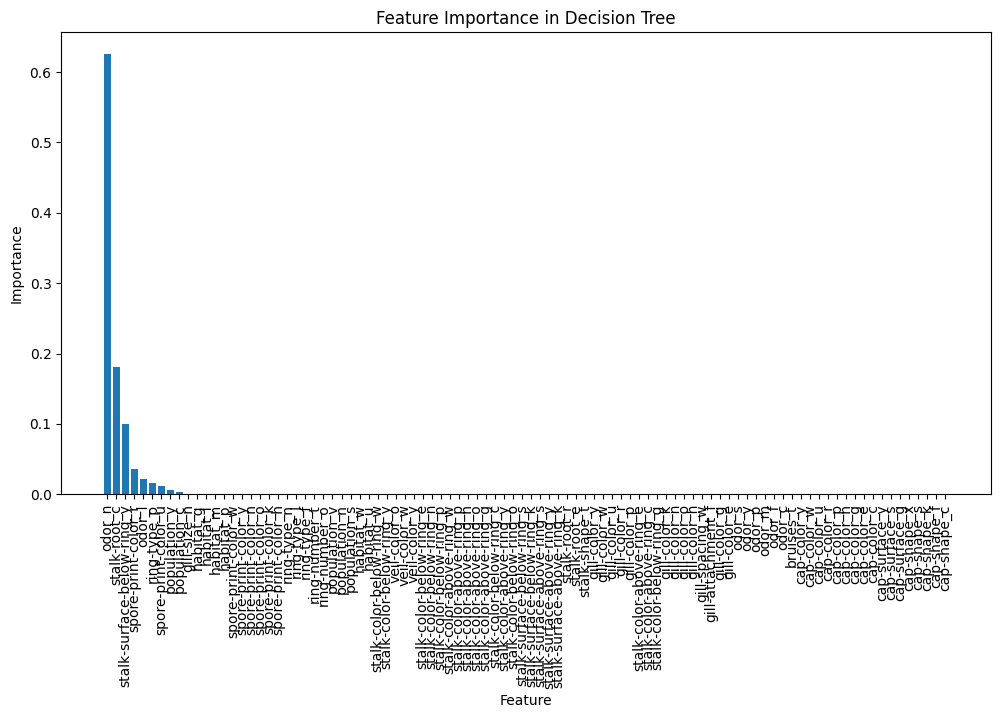

In [252]:
# Assign target variable
y = mushroom_df["poisonous"]  # Extract target column

# Encode the target variable (0 = Poisonous, 1 = Edible)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure we drop only existing columns
columns_to_drop = ["poisonous", "poisonous_numeric"]
existing_columns = [col for col in columns_to_drop if col in mushroom_df.columns]

# Drop only existing columns from X
X = mushroom_df.drop(columns=existing_columns)  

# One-Hot Encode categorical features
X = pd.get_dummies(X, drop_first=True)  # Converts categorical variables to numeric

# Verify processed data
print("\nData Preprocessing Complete")
print(f"Final X shape: {X.shape}, Final y shape: {y.shape}")
print("\nSample X after encoding:\n", X.head())

# Initialize StratifiedShuffleSplit (maintains class balance)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # y is now a NumPy array

# ✅ Apply regularization to prevent overfitting
dt_model = DecisionTreeClassifier(
    max_depth=5,               # Restrict tree depth
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples in leaf node
    random_state=42
)
dt_model.fit(X_train, y_train)

# Make Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Model Performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

performance_output = f"""
Decision Tree Model Performance:
Training Accuracy: {train_acc:.4f}
Testing Accuracy: {test_acc:.4f}

Classification Report:
{classification_report(y_test, y_test_pred)}
"""

print(performance_output)

# Save trained model for future use
model_path = r"c:\Projects\ml04\models\decision_tree_mushroom.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(dt_model, model_path)

# Confirm model save
print(f"\nModel saved successfully to: {model_path}")

# Load model to confirm it saved correctly
dt_model_loaded = joblib.load(model_path)
print("\nLoaded model from joblib, ready for inference!")

feature_importances = dt_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Use cross-validation to check generalization
cv_scores = cross_val_score(dt_model, X, y, cv=5)
cv_output = f"""
Cross-validation scores: {cv_scores}
Mean CV accuracy: {cv_scores.mean():.4f}
"""


##### 4.1.2. Random Forest Classifier

For the Random Forest Classifier, I will also use StratifiedShuffleSplit to maintain the class balance, as Random Forest models can be affected by imbalanced datasets. The ensemble nature of Random Forest improves overfitting issues that may arise in a single Decision Tree. <br>


Data Preprocessing Complete
Final X shape: (8124, 94), Final y shape: (8124,)

Sample X after encoding:
    cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_t  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  odor_y  gill-attachment_f  gill-spacing_w  gill-size_n  gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stalk-shape_t  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-above-ring_y  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_c  stalk-color-above-ring_e  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_o  stalk-color-above-ring_p  stalk-

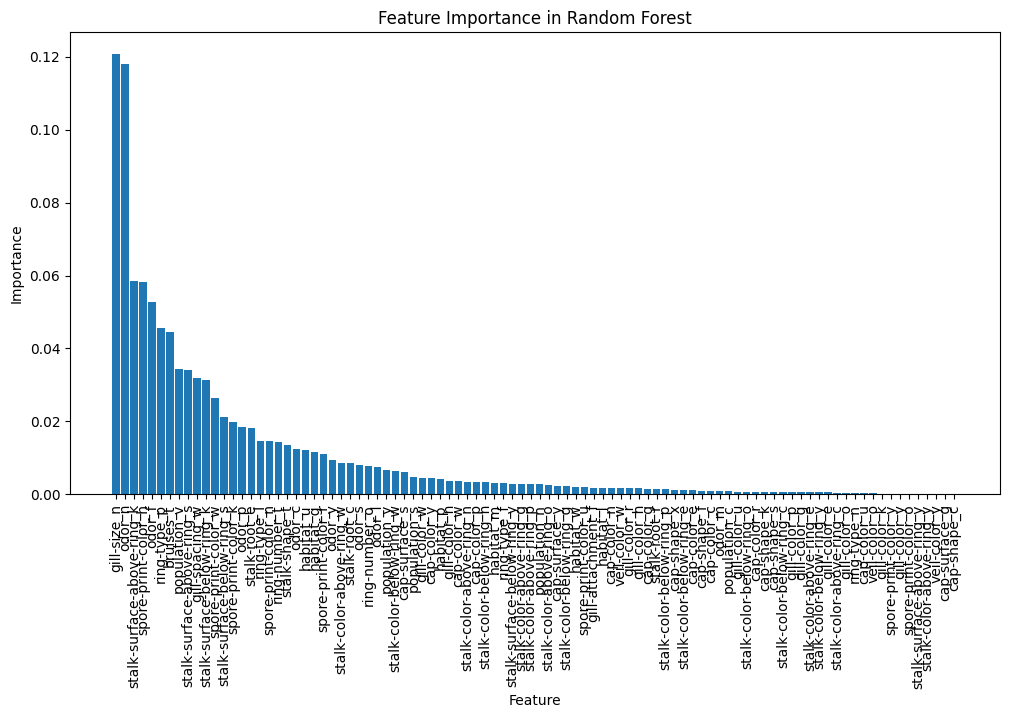

In [251]:
# Assign target variable
y = mushroom_df["poisonous"]  # Extract target column

# Encode the target variable (0 = Poisonous, 1 = Edible)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure we drop only existing columns
columns_to_drop = ["poisonous", "poisonous_numeric"]
existing_columns = [col for col in columns_to_drop if col in mushroom_df.columns]

# Drop only existing columns from X
X = mushroom_df.drop(columns=existing_columns)  

# One-Hot Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Verify processed data
print("\nData Preprocessing Complete")
print(f"Final X shape: {X.shape}, Final y shape: {y.shape}")
print("\nSample X after encoding:\n", X.head())

# Initialize StratifiedShuffleSplit (maintains class balance)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # y is now a NumPy array

# Apply regularization to Random Forest to prevent overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # Restrict depth to prevent memorization
    min_samples_split=10,       # Require minimum samples to split
    min_samples_leaf=5,         # Require minimum samples per leaf
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Model Performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

performance_output = f"""
Random Forest Model Performance:
Training Accuracy: {train_acc:.4f}
Testing Accuracy: {test_acc:.4f}

Classification Report:
{classification_report(y_test, y_test_pred)}
"""

print(performance_output)

# Save trained model for future use
model_path = r"c:\Projects\ml04\models\random_forest_mushroom.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(rf_model, model_path)

print(f"\nModel saved successfully to: {model_path}")

# Load model to confirm it saved correctly
rf_model_loaded = joblib.load(model_path)
print("\nLoaded model from joblib, ready for inference.")

# Check feature importance
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Use cross-validation to check generalization
cv_scores = cross_val_score(rf_model, X, y, cv=5)
cv_output = f"""
Cross-validation scores: {cv_scores}
Mean CV accuracy: {cv_scores.mean():.4f}
"""


##### 4.1.3. Logistic Regression Classifier

For Logistic Regression, I will also use StratifiedShuffleSplit because logistic models assume balanced class distributions, and imbalance can lead to biased decision boundaries. <br>


Data Preprocessing Complete
Final X shape: (8124, 94), Final y shape: (8124,)

Sample X after encoding:
    cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_t    odor_c    odor_f    odor_l    odor_m    odor_n    odor_p    odor_s    odor_y  gill-attachment_f  gill-spacing_w  gill-size_n  gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stalk-shape_t  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-above-ring_y  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_c  stalk-color-above-ring_e  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_o  stalk-color-abov

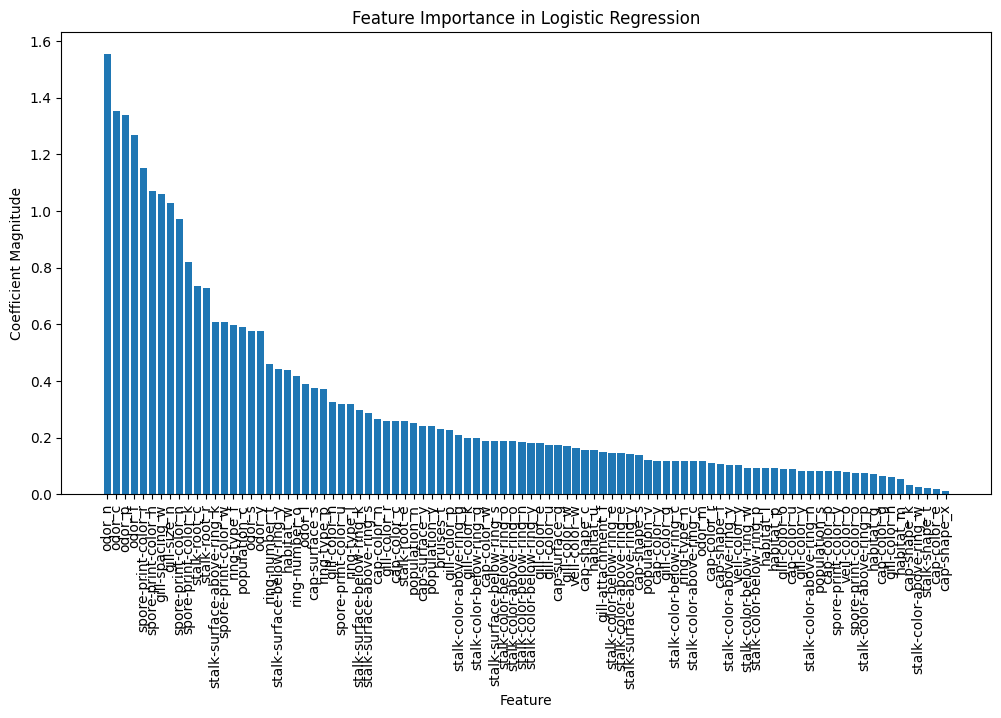

In [250]:
# Assign target variable
y = mushroom_df["poisonous"]  # Extract target column

# Encode the target variable (0 = Poisonous, 1 = Edible)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure we drop only existing columns
columns_to_drop = ["poisonous", "poisonous_numeric"]
existing_columns = [col for col in columns_to_drop if col in mushroom_df.columns]

# Drop only existing columns from X
X = mushroom_df.drop(columns=existing_columns)  

# One-Hot Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale the data (Logistic Regression performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify processed data
print("\nData Preprocessing Complete")
print(f"Final X shape: {X_scaled.shape}, Final y shape: {y.shape}")
print("\nSample X after encoding:\n", pd.DataFrame(X_scaled, columns=X.columns).head())

# Initialize StratifiedShuffleSplit (maintains class balance)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]  # y is now a NumPy array

# Train Logistic Regression Model with L2 regularization
log_model = LogisticRegression(
    max_iter=500,   # Increased iterations to ensure convergence
    penalty="l2",   # Default L2 regularization to prevent overfitting
    C=0.5,          # Regularization strength (lower = stronger regularization)
    random_state=42
)
log_model.fit(X_train, y_train)

# Make Predictions
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Model Performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

performance_output = f"""
Logistic Regression Model Performance:
Training Accuracy: {train_acc:.4f}
Testing Accuracy: {test_acc:.4f}

Classification Report:
{classification_report(y_test, y_test_pred)}
"""

print(performance_output)

# Save trained model for future use
model_path = r"c:\Projects\ml04\models\logistic_regression_mushroom.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(log_model, model_path)

print(f"\nModel saved successfully to: {model_path}")

# Load model to confirm it saved correctly
log_model_loaded = joblib.load(model_path)
print("\nLoaded model from joblib, ready for inference.")

# Feature Importance Analysis (based on absolute coefficients)
import matplotlib.pyplot as plt
import numpy as np

feature_importance = abs(log_model.coef_).flatten()
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.show()

# Corrected: Use `log_model` instead of `rf_model` for cross-validation
cv_scores = cross_val_score(log_model, X_scaled, y, cv=5)
cv_output = f"""
Cross-validation scores: {cv_scores}
Mean CV accuracy: {cv_scores.mean():.4f}
"""

#### 4.2 Train model using Scikit-Learn model.fit() method.

To train a model on the mushroom dataset, I first preprocess the data by encoding categorical features and ensuring numerical compatibility. I then split the dataset using StratifiedShuffleSplit to maintain class balance. After splitting the data, I initialize a Decision Tree Classifier and train it using Scikit-Learn’s .fit() method. <br>


Data Preprocessing Complete
Final X shape: (8124, 94), Final y shape: (8124,)

Decision Tree Model Performance:
Training Accuracy: 0.9969
Testing Accuracy: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Model successfully saved to: c:\Projects\ml04\models\decision_tree_mushroom.pkl


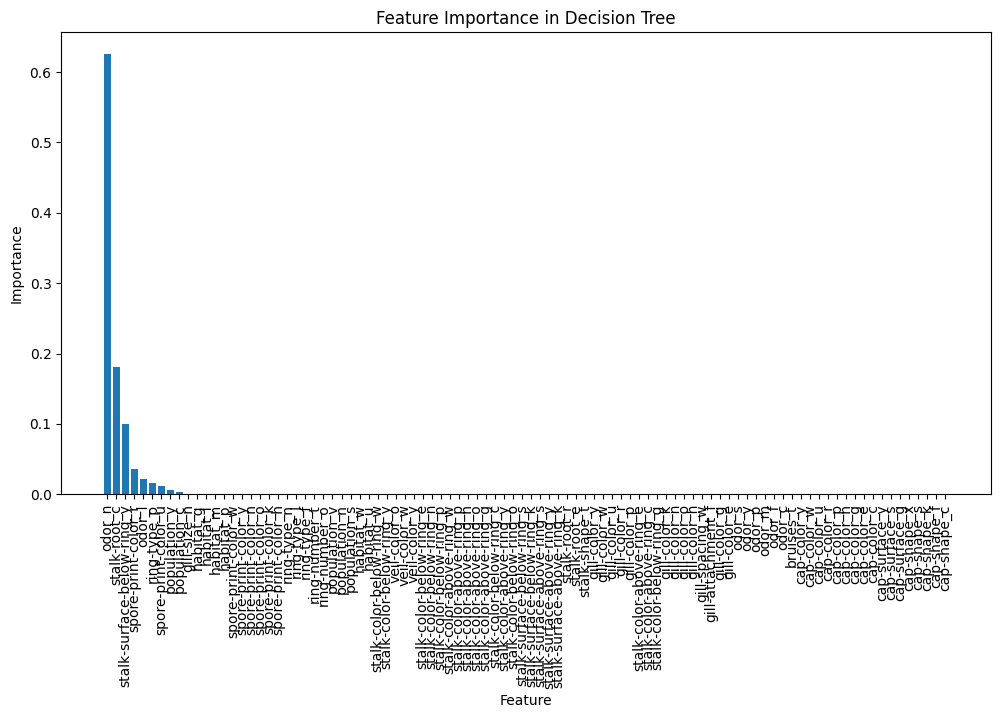

In [248]:
# Assign target variable
y = mushroom_df["poisonous"]  # Extract target column

# Encode the target variable (0 = Poisonous, 1 = Edible)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Drop target column and process categorical features
X = mushroom_df.drop(columns=["poisonous"])  
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding

# Verify processed data
print("\nData Preprocessing Complete")
print(f"Final X shape: {X.shape}, Final y shape: {y.shape}")

# Split data using StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # y is a NumPy array

# Apply regularization to prevent overfitting
dt_model = DecisionTreeClassifier(
    max_depth=5,               # Restrict tree depth
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples in leaf node
    random_state=42
)
dt_model.fit(X_train, y_train)  # Train the model

# Make Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate Model Performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

performance_output = f"""
Decision Tree Model Performance:
Training Accuracy: {train_acc:.4f}
Testing Accuracy: {test_acc:.4f}

Classification Report:
{classification_report(y_test, y_test_pred)}
"""

print(performance_output)

# Save trained model
model_path = r"c:\Projects\ml04\models\decision_tree_mushroom.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(dt_model, model_path)

print(f"\nModel successfully saved to: {model_path}")

# Check feature importance
feature_importances = dt_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Corrected: Use `dt_model` instead of `rf_model` for cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
cv_output = f"""
Cross-validation scores: {cv_scores}
Mean CV accuracy: {cv_scores.mean():.4f}
"""

#### 4.3 Evaluate Performance

When I build a machine learning model, evaluating its performance is a crucial step to ensure it generalizes well to unseen data. Without proper evaluation, I cannot determine whether the model is overfitting, underfitting, or making meaningful predictions. <br>

Beyond just numbers, evaluating performance allows me to understand potential biases and weaknesses in my model. For example, a high overall accuracy may be misleading if the model performs poorly on a specific class in an imbalanced dataset. This is why I consider precision and recall, particularly in scenarios where false positives or false negatives carry significant consequences. <br>

Incorporating feature importance analysis further enhances my understanding of the model. It allows me to see which variables contribute the most to predictions, helping with feature selection and improving interpretability. <br>

Ultimately, evaluating model performance ensures that I am deploying a robust and reliable solution. By carefully analyzing the results, I can refine my approach, make necessary adjustments, and confidently move forward with a model that will perform well in real-world applications. <br>

##### 4.3.1 Regression: R^2, MAE, RMSE

When I build regression models, I need to evaluate their performance to ensure they make accurate and reliable predictions. Unlike classification models, where I assess accuracy and precision, regression models require different metrics because they predict continuous values rather than discrete categories. The three primary metrics I use for regression evaluation are R² (R-squared), MAE (Mean Absolute Error), and RMSE (Root Mean Squared Error). <br>

In [247]:
# Compute Regression Metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print Regression Metrics
print("\nRegression Metrics (Evaluating Classification Model as Regression):")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Regression Metrics (Evaluating Classification Model as Regression):
R² Score: 0.9901
Mean Absolute Error (MAE): 0.0025
Root Mean Squared Error (RMSE): 0.0496


##### 4.3.2. Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix

When I evaluate my classification models, I rely on multiple metrics to get a clear understanding of how well the model is performing. While accuracy is a common metric, it does not always tell the full story, especially when dealing with imbalanced datasets. I will use other tools and metrics to evaluate the reliability of the model to predict the outcome of an input. <br>


Classification Metrics:
Accuracy: 0.9975
Precision: 0.9949
Recall: 1.0000
F1-score: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



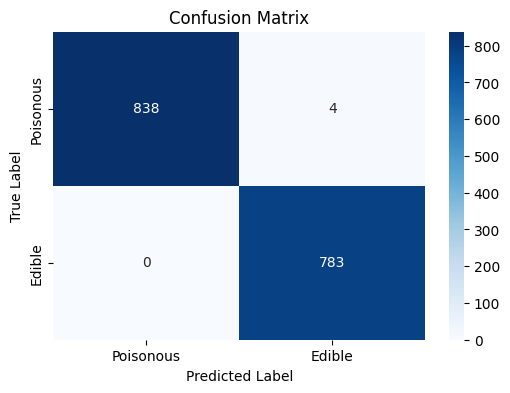

In [ ]:
# Make Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate Classification Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Poisonous", "Edible"], yticklabels=["Poisonous", "Edible"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##### 4.3.3. Clustering: Inertia, Silhouette Score

When I evaluate clustering models, I use inertia and silhouette score to measure how well the clusters are formed. Inertia tells me how tightly the data points are grouped around their cluster centers. A lower inertia means that the clusters are more compact, which generally indicates a better clustering result. However, inertia alone is not always reliable, especially when the number of clusters changes. Silhouette Score helps me understand how well-separated the clusters are. It measures how similar a point is to its assigned cluster compared to other clusters. A score close to 1 means the clusters are well-defined, while a score near 0 suggests overlapping clusters. A negative score indicates that some points may be misclassified. <br>

By using both metrics, I can determine if my clustering model correctly groups the mushrooms based on their features and whether the clusters are meaningful for analysis. <br>

In [246]:
# Prepare the data for clustering (One-Hot Encoding)
X_cluster = pd.get_dummies(mushroom_df.drop(columns=["poisonous"]), drop_first=True)

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply PCA before clustering (reduce dimensions)
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Define the number of clusters (use a reasonable value)
num_clusters = 3  # Adjust based on the Elbow Method

# Run K-Means on PCA-transformed data
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_pca)

# Compute Metrics after PCA
inertia_pca = kmeans.inertia_
silhouette_pca = silhouette_score(X_pca, kmeans.labels_)

# Print Metrics
print("\nClustering Metrics After PCA:")
print(f"Inertia: {inertia_pca:.4f}")
print(f"Silhouette Score: {silhouette_pca:.4f}")

# Save clustering results to a file
output_file = r"c:\Projects\ml04\data\clustering_results.txt"
os.makedirs(os.path.dirname(output_file), exist_ok=True)


Clustering Metrics After PCA:
Inertia: 139864.5904
Silhouette Score: 0.4065


### Reflection 4: How well did the model perform? Any surprises in the results?



## References:

Arora, D. (1986). _Mushrooms Demystified: A Comprehensive Guide to the Fleshy Fungi._ Ten Speed Press.

Chandola, V., Banerjee, A., & Kumar, V. (2009). _Anomaly detection: A survey._ ACM Computing Surveys, _41_(3), 1-58. https://doi.org/10.1145/1541880.1541882

Danks, H. V. (1993). _Edible and Poisonous Mushrooms: Identifying and Understanding Fungal Toxins._ Mycological Research, _97_(6), 643-655.

Data-Git-Hub. (2025). GitHub - Data-Git-Hub/ml04. GitHub. https://github.com/Data-Git-Hub/ml04

Guyon, I., & Elisseeff, A. (2003). _An introduction to variable and feature selection._ Journal of Machine Learning Research, _3_(Mar), 1157-1182.

Leys, C., Ley, C., Klein, O., Bernard, P., & Licata, L. (2013). _Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median._ Journal of Experimental Social Psychology, _49_(4), 764-766. https://doi.org/10.1016/j.jesp.2013.03.013

‌Mushroom [Dataset]. (1981). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, É. (2011). _Scikit-learn: Machine learning in Python._ Journal of Machine Learning Research, _12_, 2825–2830.

Tulloss, R. E. (2009). _Amanita phalloides: Toxicity and Identification._ Mycologia, _101_(3), 456–464.
